
**Exercici 1**  
  
Parteix el conjunt de dades adjunt en train i test.  
Estudia els dos conjunts per separat, a nivell descriptiu. (Trobaràs una descripció de les diferents variables del dataset.)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
viviendas = pd.read_csv('housing data.csv', header = None)
viviendas.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


El archivo .txt proporciona la información con el nombre de las columnas así como su significado:  
  
- **CRIM** Tasa de criminalidad per cápita por ciudad
- **ZN** Proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados
- **INDUS** Proporción  de acres comerciales no minoristas por ciudad
- **CHAS** Variable ficticia Charles River (Si limita con el rio = 1, 0 de lo contrario)
- **NOX** Concentración de óxidos nítricos  (partes por 10 millones)
- **RM** Promedio de cuartos por vivienda
- **AGE** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- **DIS** Distancias ponderadas  a cinco centros de empleo de Boston
- **RAD** Índice  de accesibilidad a vías radiales
- **TAX** Tasa de impuesto sobre valor total de la propiedad (por cada $10,000)
- **PTRATIO** Ratio alumno-profesor por municipio
- **B** Proporción de Población Afroamericana por ciudad.
- **LSTAT** Proporción población en situación socioeconomica vulnerable
- **MEDV** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [3]:
viviendas.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
viviendas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
print(viviendas.shape)
viviendas.info()
# No hay valores nulos (506 non-null en todas las variables)

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
viviendas.loc[viviendas.duplicated()].count()
# No hay valores duplicados

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No existen valores duplicados ni nulos en el dataframe, donde todos lo valores son numéricos (Float o Integer).  
Esta formado por 14 columnas y 506 filas y a continuación aparece un resumen estadístico:

In [7]:
round(viviendas.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


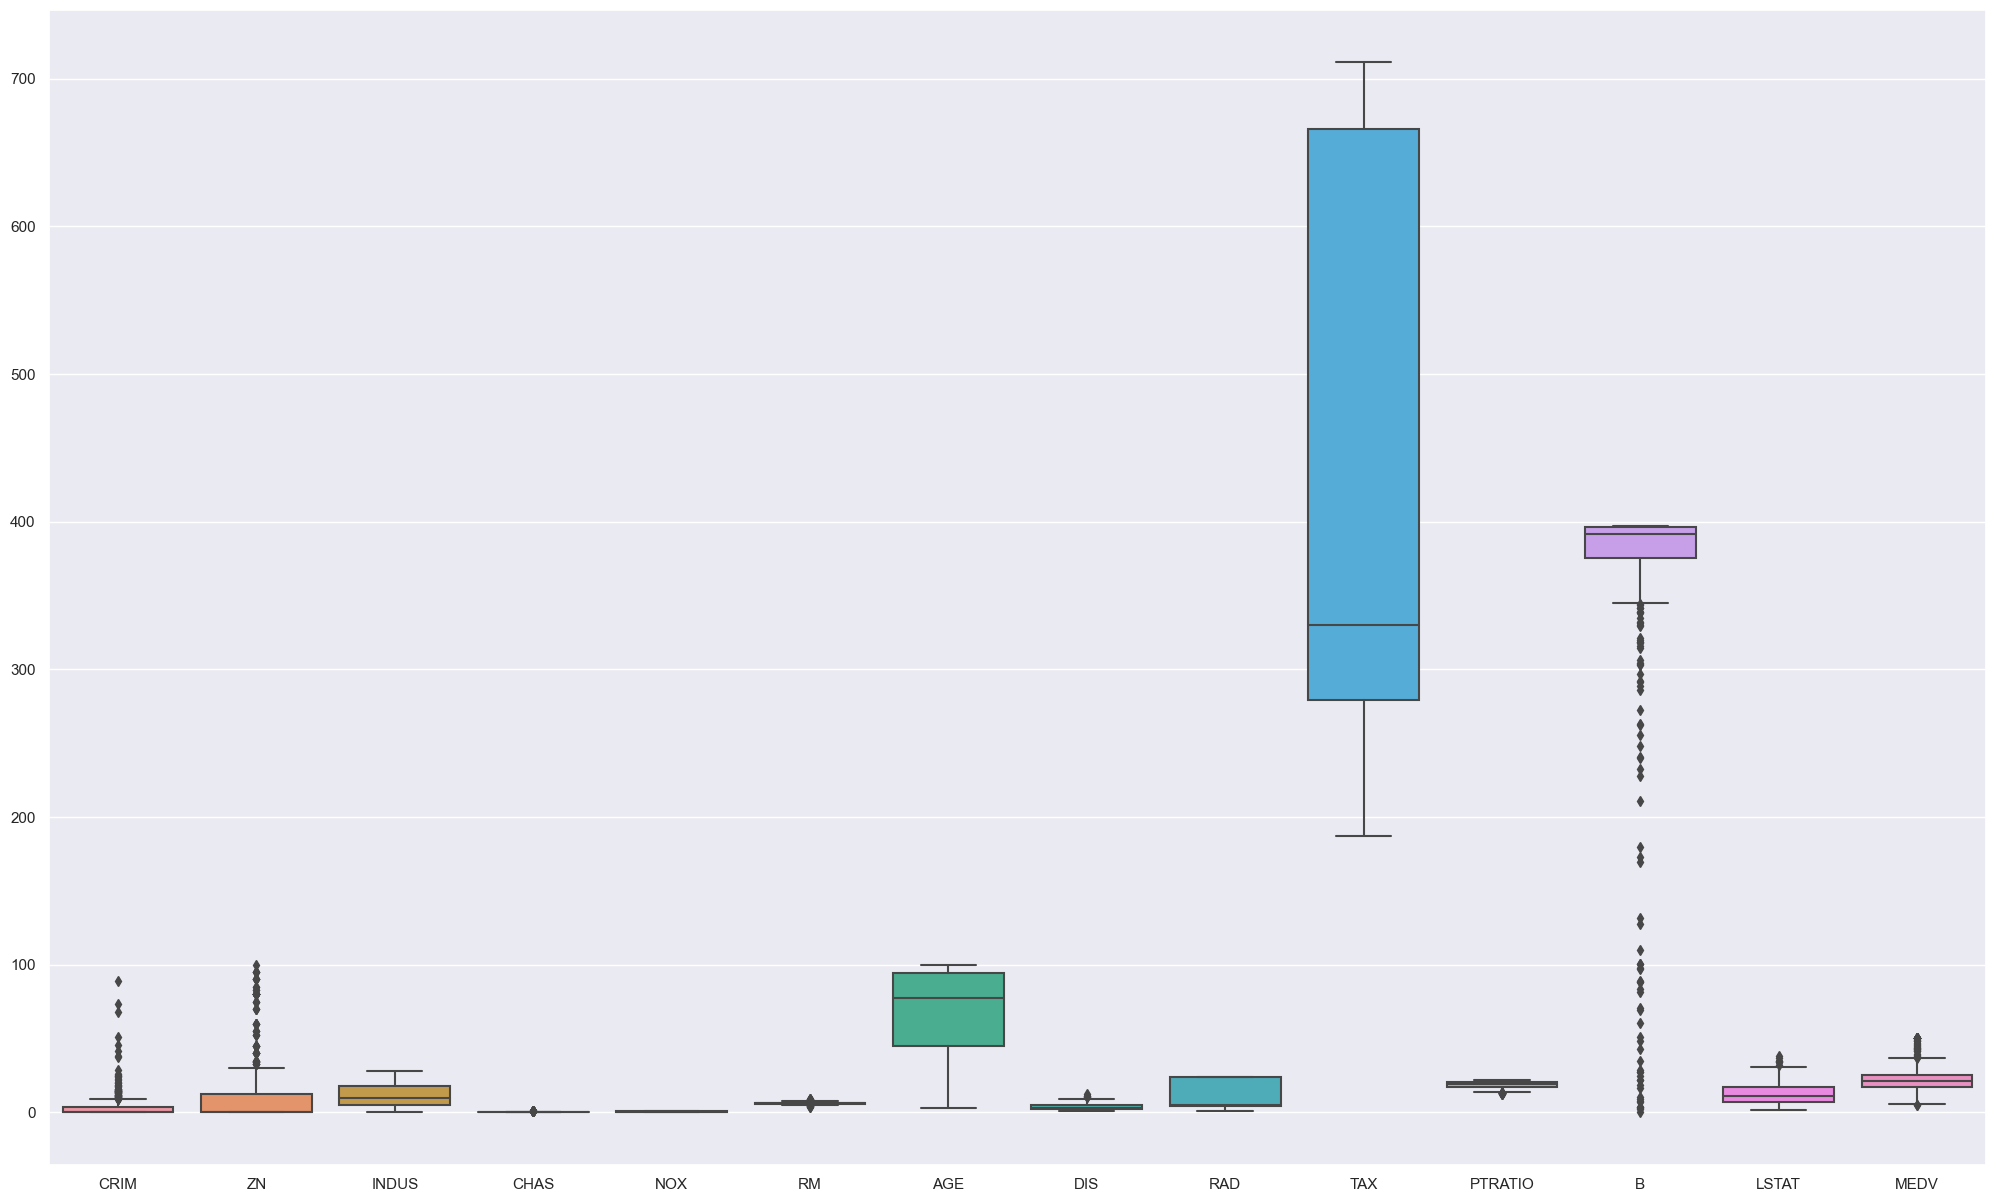

In [8]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (25,15))
sns.set_theme(style="darkgrid")
sns.boxplot(viviendas)
plt.show();

Un vistazo a la representación grafica de las variables, podemos ver que existen varias de ellas que contienen outliers: CRIM, ZM, MEDV... Especialmente la población afroamericana.

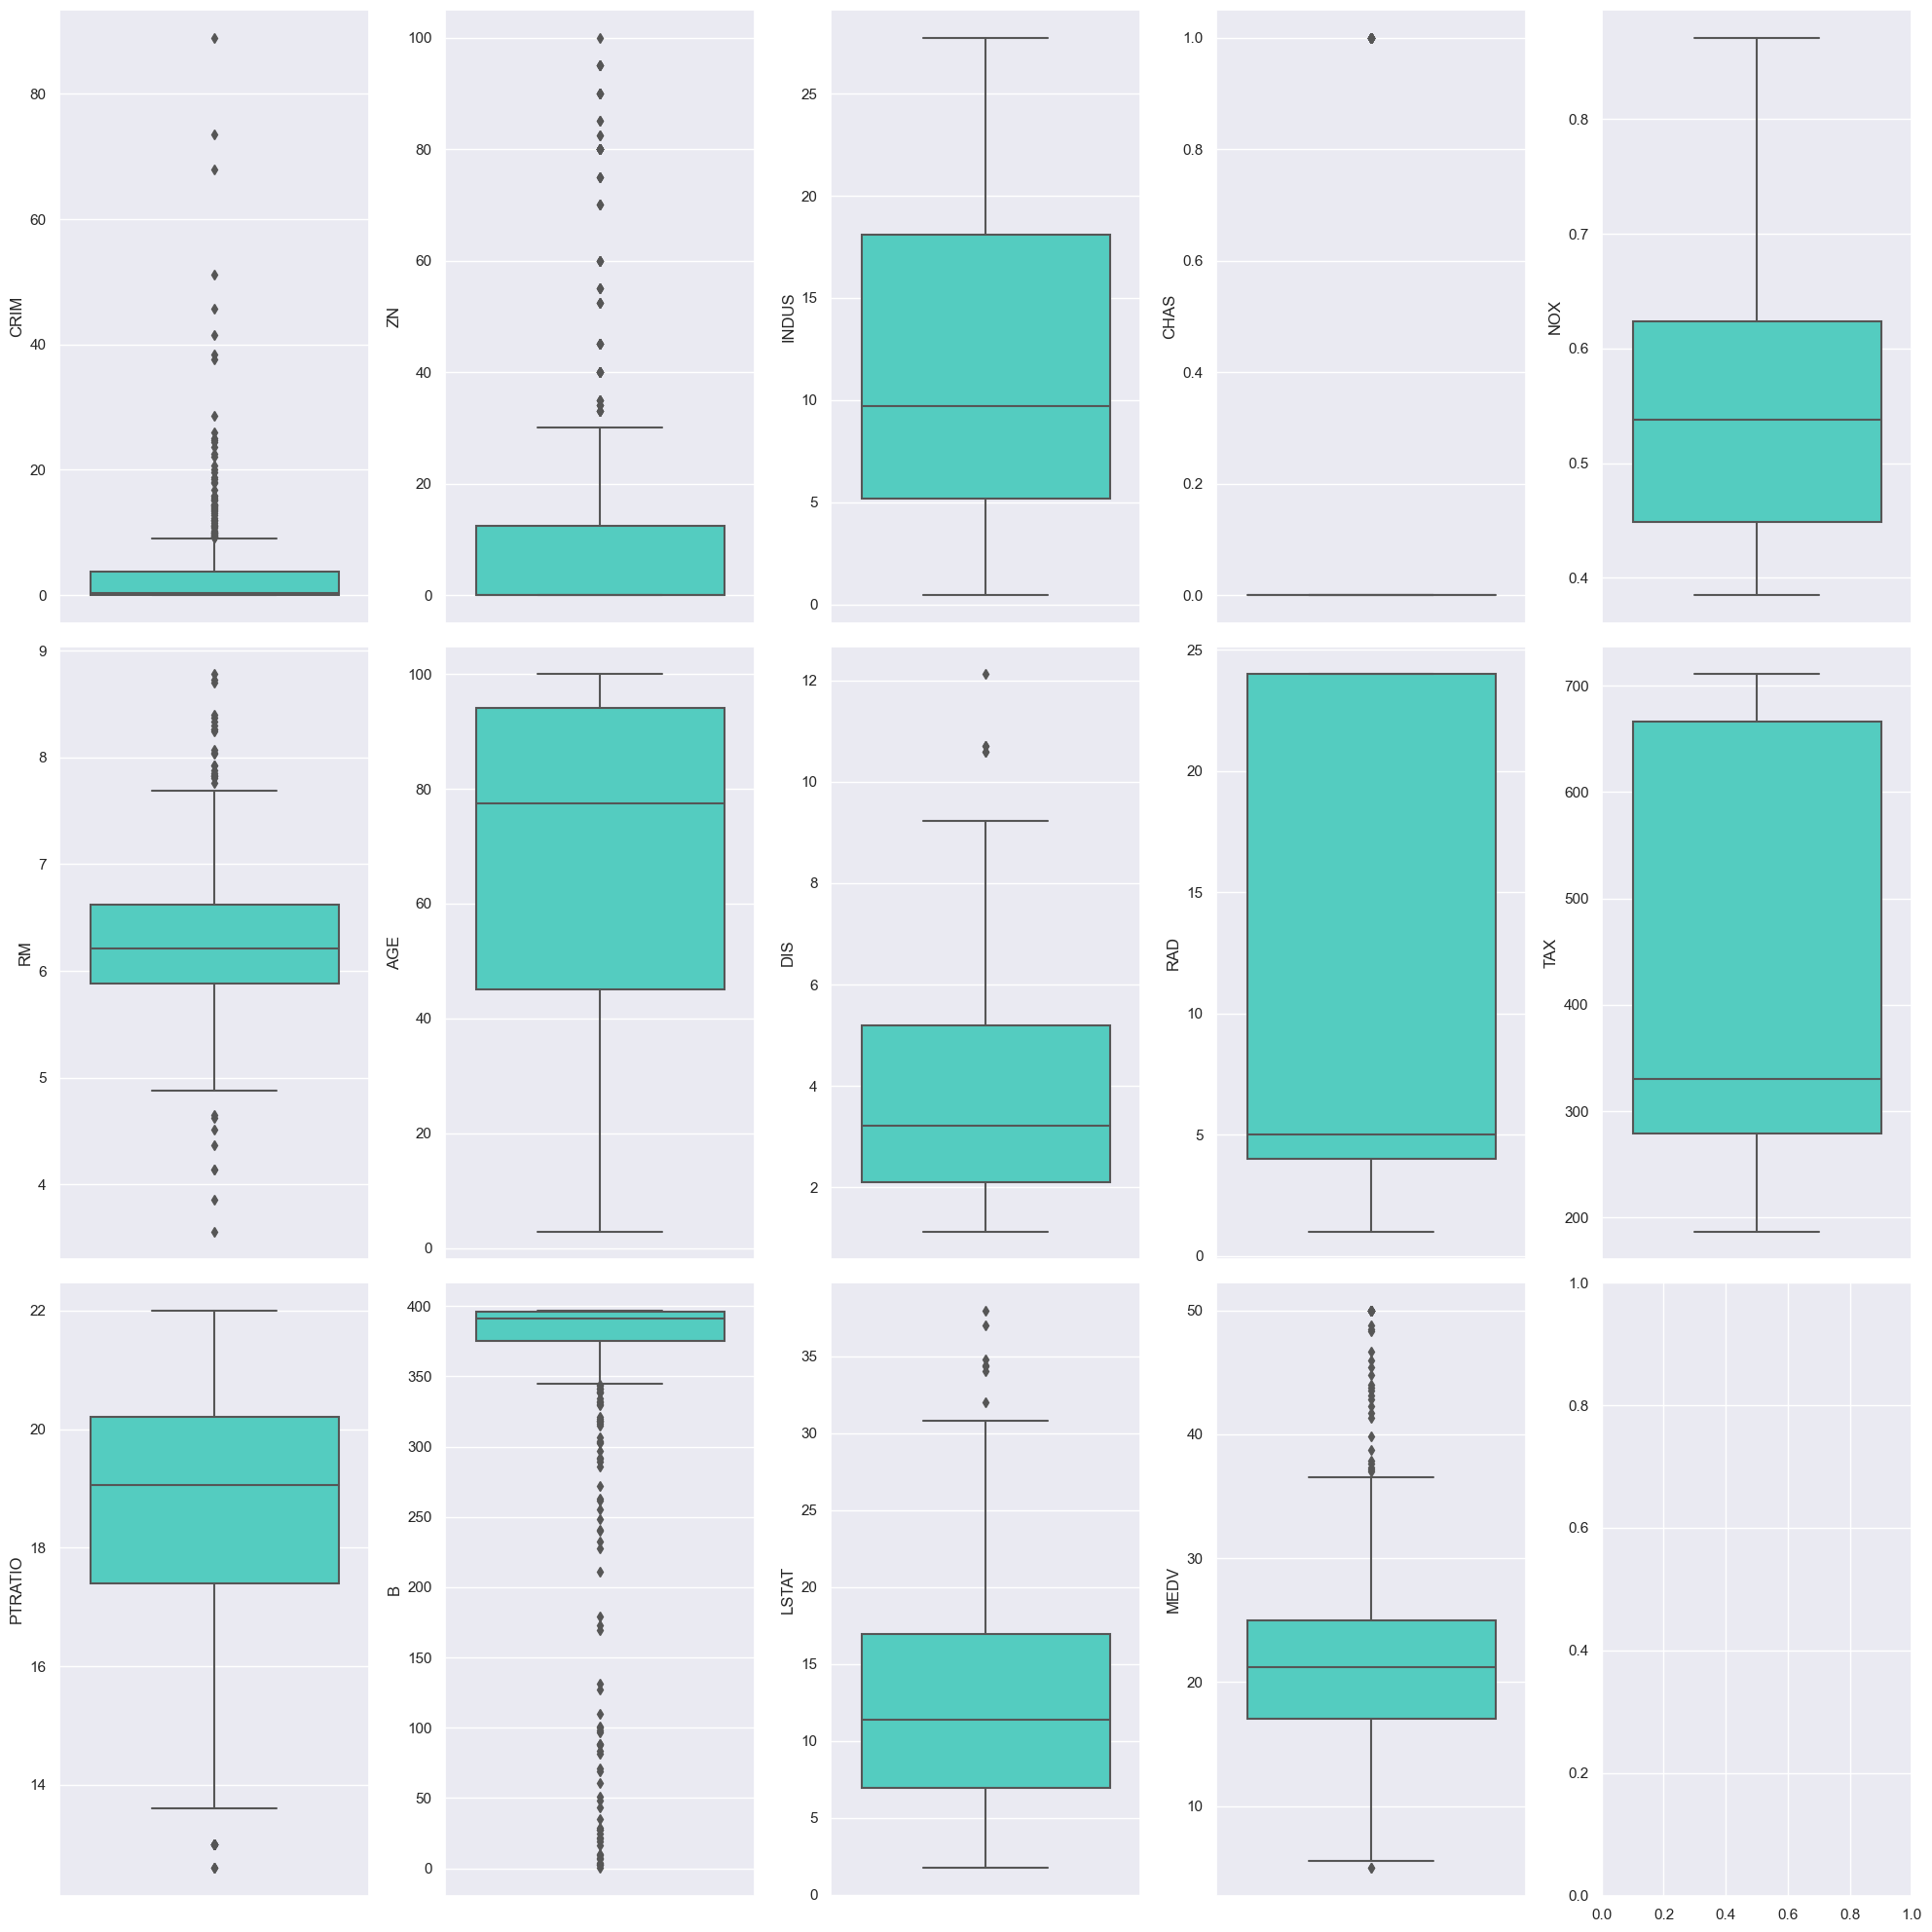

In [9]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 20))
index = 0
axs = axs.flatten()
for key, value in viviendas.items():
    sns.boxplot(y=key, data=viviendas, ax=axs[index], color = 'turquoise')
    index += 1
plt.tight_layout()


In [10]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
for i in viviendas.columns:
    data = viviendas[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

CRIM
stat=0.450, p=0.000
Probably not Gaussian
ZN
stat=0.556, p=0.000
Probably not Gaussian
INDUS
stat=0.900, p=0.000
Probably not Gaussian
CHAS
stat=0.275, p=0.000
Probably not Gaussian
NOX
stat=0.936, p=0.000
Probably not Gaussian
RM
stat=0.961, p=0.000
Probably not Gaussian
AGE
stat=0.892, p=0.000
Probably not Gaussian
DIS
stat=0.903, p=0.000
Probably not Gaussian
RAD
stat=0.680, p=0.000
Probably not Gaussian
TAX
stat=0.815, p=0.000
Probably not Gaussian
PTRATIO
stat=0.904, p=0.000
Probably not Gaussian
B
stat=0.477, p=0.000
Probably not Gaussian
LSTAT
stat=0.937, p=0.000
Probably not Gaussian
MEDV
stat=0.917, p=0.000
Probably not Gaussian


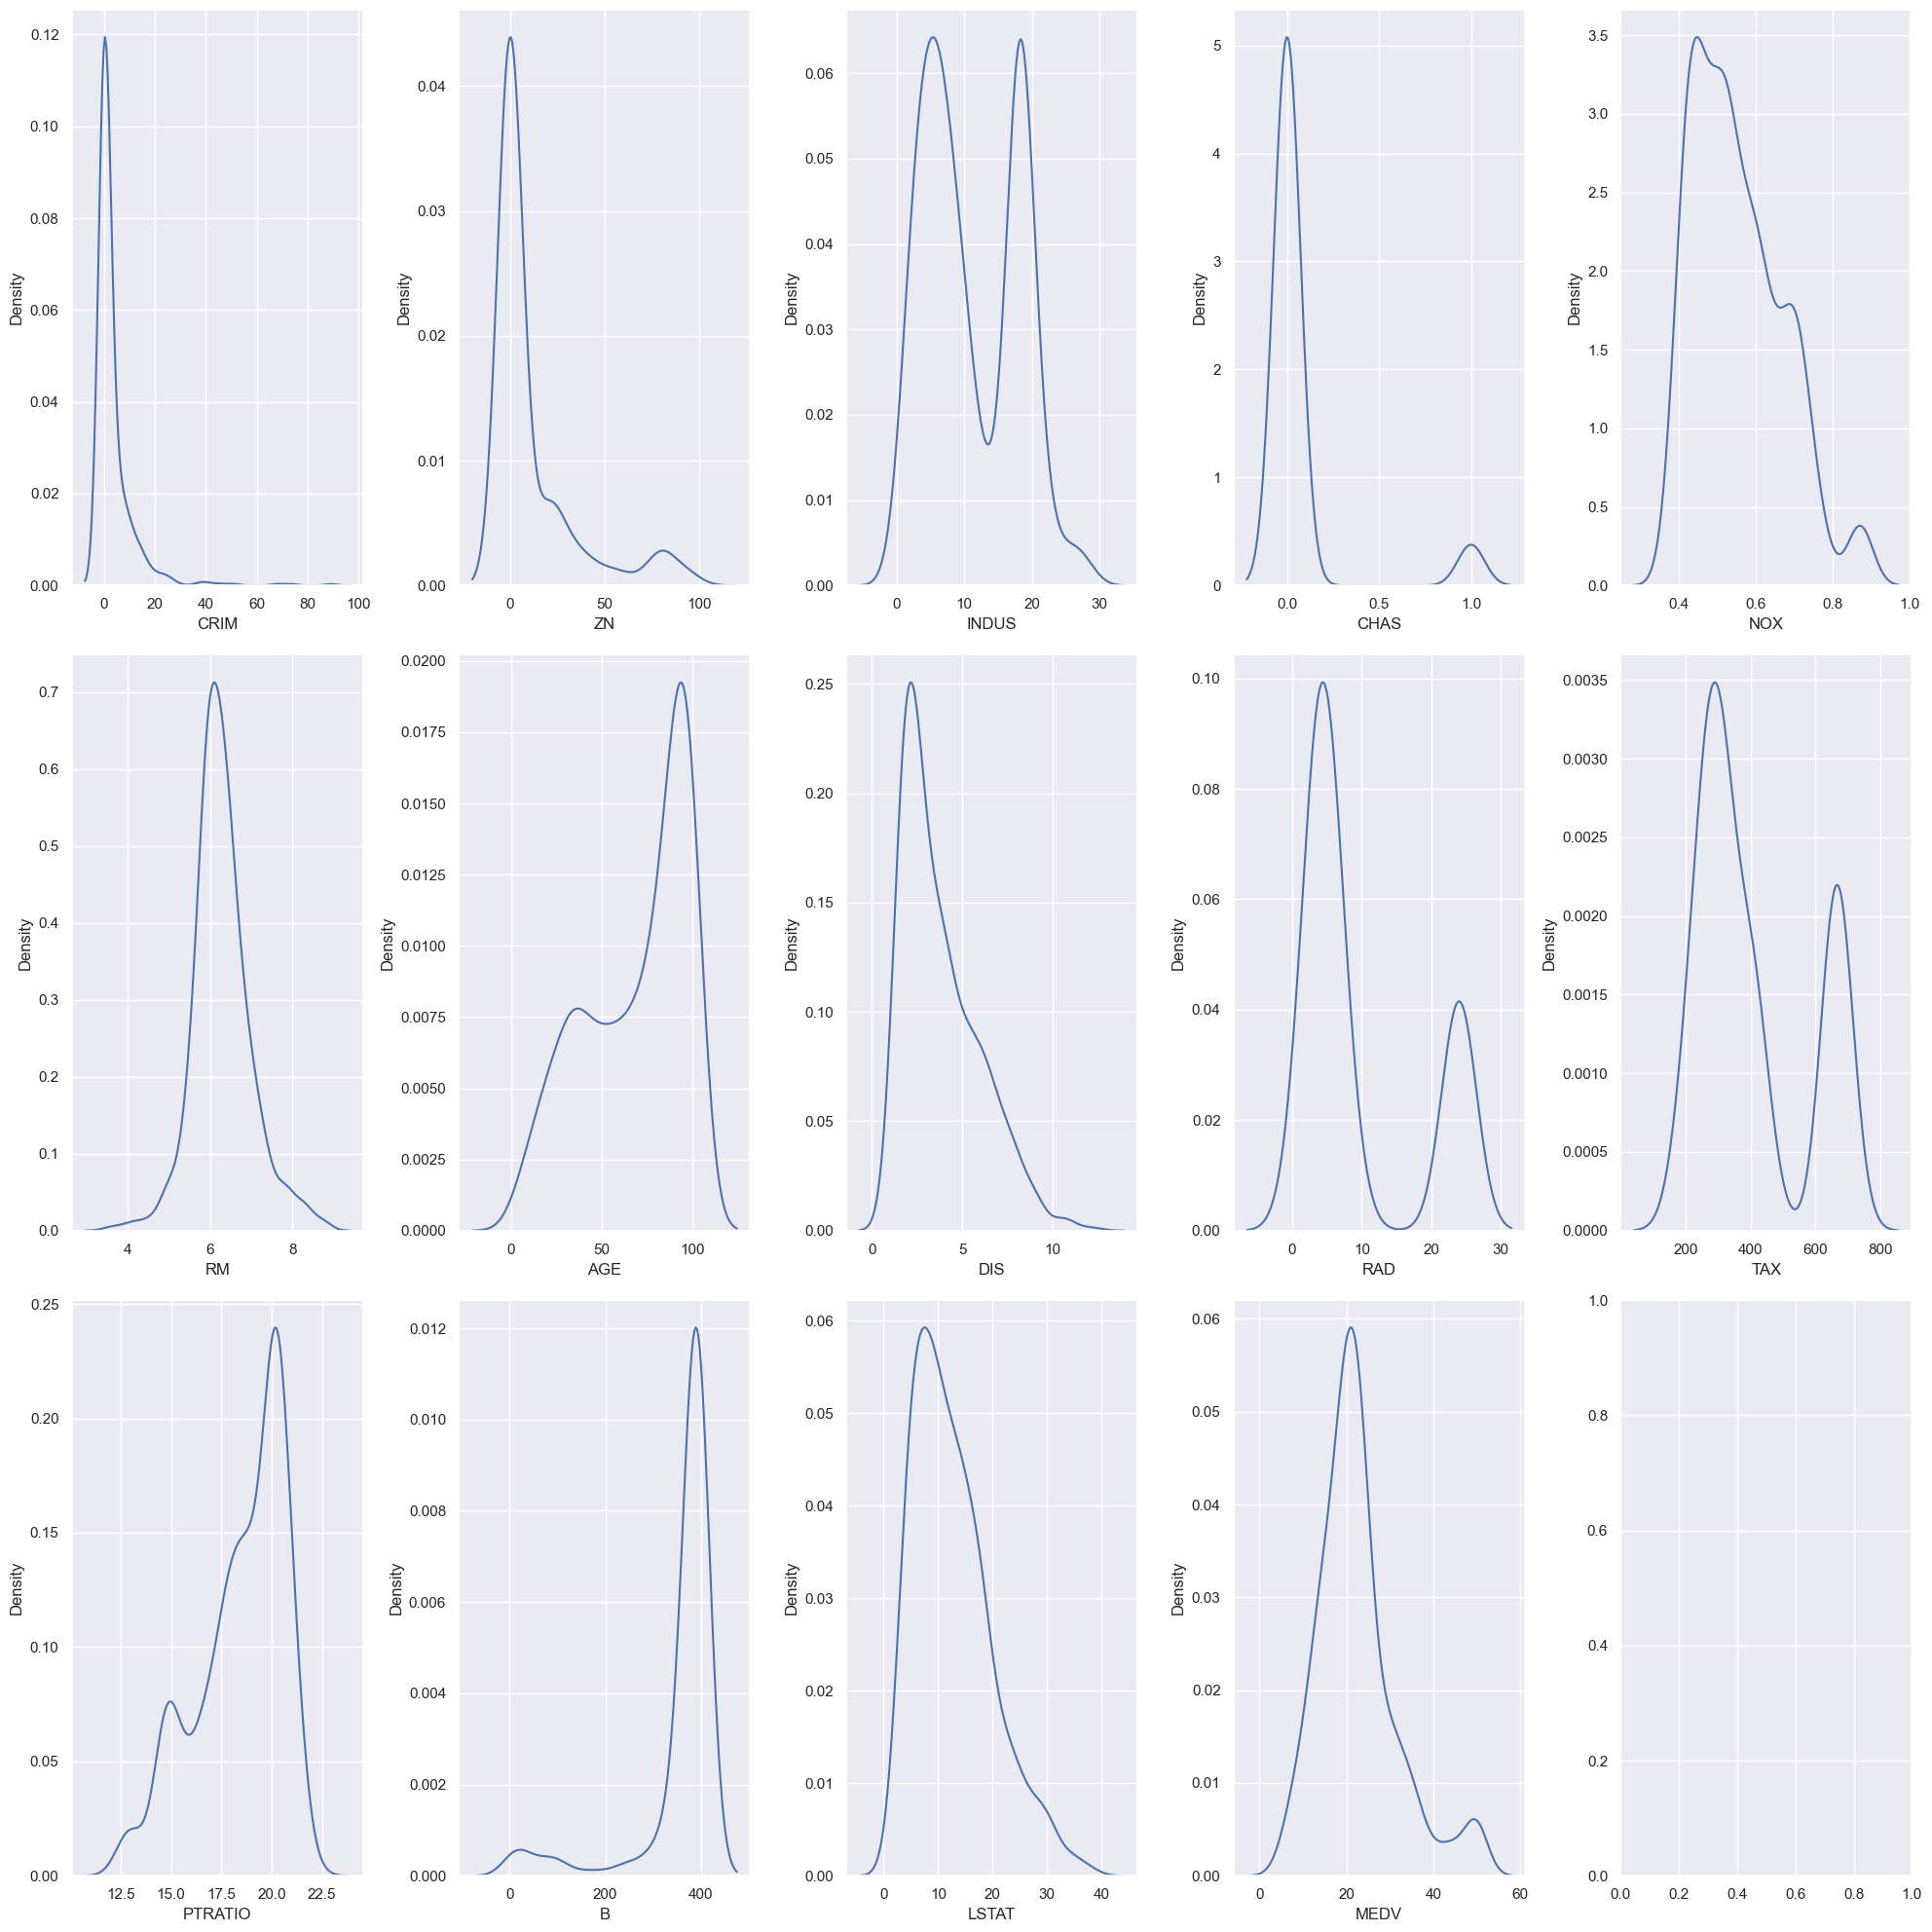

In [11]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 20))
index = 0
axs = axs.flatten()
for key, value in viviendas.items():
    sns.kdeplot(x=key, data=viviendas, ax=axs[index])
    index += 1
plt.tight_layout()

Con ayuda del test de Shapiro y las representaciones gráficas, podemos comprobar que las distribuciones de **no son Gaussianas**.

Representamos gráficamente la correlación que existe entre las diferentes variables:

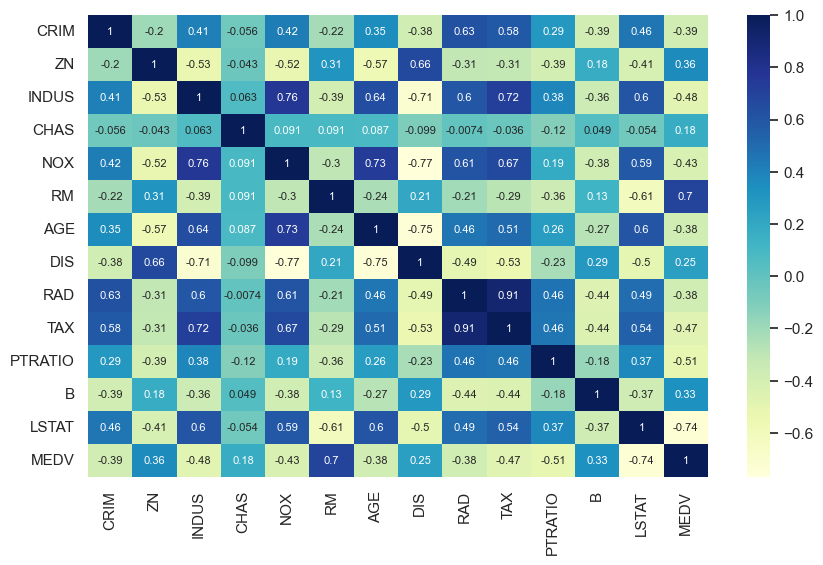

In [12]:
plt.subplots(figsize=(10, 6))
heatmap = sns.heatmap(viviendas.corr(),cmap = 'YlGnBu',annot = True, annot_kws = {"size": 8})

Relaciones positivas:
- NOX, INDUS: 0.76. A mayor extensiónde negocios no minoristas, mayor Concentración de óxidos de nitrógeno.  
- AGE, INDUS: 0.64. A mayor numero de viviendas construidas antes de 1940, mayor extension de negocios no minoristas.  
- TAX, INDUS: 0.72. A mayor impuestos sobre la propiedad, mayor extension de negocios no minoristas.  
- AGE, NOX: 0.73.  A mayor numero de viviendas construidas antes de 1940, mayor Concentración de óxidos de nitrógeno.  
- TAX, NOX: 0.67. A mayor impuestos sobre la propiedad, mayor numero de viviendas construidas antes de 1940.  
- RM, MED: 0.7. A mayor numero de habitaciones de la vivienda, mayor Valor medio de las viviendas .  
- TAX, RAD: 0.91. A mejor acceso a las carreteras radiales, mayor impuestos sobre la propiedad.  
    
Relaciones Negativas:
- DIS, INDUS: -0.71. A mejor acceso a los centros de empleo, menor extension de negocios no minoristas.  
- DIS, NOX: -0.77. A mejor acceso a los centros de empleo, menor oncentración de óxidos de nitrógeno.  
- DIS, AGE: -0.75. A mejor acceso a los centros de empleo, menor numero de viviendas construidas antes de 1940.  
- MEDV, LSTAT: -0.74. A mayor precio medio de las viviendas, menor Porcentaje de población de estatus socioeconómico bajo.  


Estudiando los datos, parece que las distintas variables son características de las viviendas o de la zona,  que deberían afectar en mayor o menor medida al precio de las mismas.  
Así escogeremos esta columna como variable objetivo (target), y estableceremos la división en dos cojuntos de datos: Uno para train y otro para test.


- importamos **train_test_split** de la libreria **sklearn.model_selection**.
- Se crea el dataset X quitando la columna target, dejando las variables independientes.
- Se crea el dataset y con los valores de la columna MEDV que será el target.
- La proporción de la separación será de 80% de los datos para el train y 20% para el test.
- Aplico random state = 7, de manera aleatoria para obtener los mismos resultados de la muestra.

In [13]:
from sklearn.model_selection import train_test_split

X = viviendas.drop('MEDV', axis = 1)
y = viviendas['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

404
404
102
102


Comprobamos que los conjuntos train (y test) son iguales entre sí (mismo tamaño).

In [15]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [16]:
y = pd.DataFrame(y)
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Una vez divididos los grupos en train y test, dividimos el grupo X en dos subgrupos:  
- Uno con las **variables categoricas** (CHAS y RAD). RAD: Es binaria y RAD: Es un indice .  
- El otro grupo con las **variables numéricas** (El resto de las variables)

In [17]:
X_train_num = X_train.drop(['CHAS', 'RAD'], axis = 1)
X_train_cat = X_train[['CHAS', 'RAD']]
X_test_num = X_test.drop(['CHAS', 'RAD'], axis = 1)
X_test_cat =X_test[['CHAS', 'RAD']]

In [18]:
round(X_train_num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.40,8.21,0.01,0.08,0.22,2.66,88.98
ZN,404.0,11.39,23.41,0.00,0.00,0.00,12.50,100.00
INDUS,404.0,11.07,7.01,0.46,5.08,8.56,18.10,27.74
NOX,404.0,0.55,0.12,0.38,0.45,0.53,0.62,0.87
RM,404.0,6.27,0.71,3.56,5.88,6.18,6.62,8.72
AGE,404.0,68.35,28.32,2.90,44.15,76.95,94.52,100.00
DIS,404.0,3.82,2.13,1.14,2.09,3.28,5.21,12.13
TAX,404.0,401.95,166.37,187.00,277.00,330.00,666.00,711.00
PTRATIO,404.0,18.39,2.17,12.60,17.00,18.80,20.20,22.00
B,404.0,359.05,87.17,2.52,376.14,391.96,396.35,396.90


In [19]:
round(X_test_num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,4.45,9.99,0.02,0.09,0.50,4.84,73.53
ZN,102.0,11.26,23.10,0.00,0.00,0.00,20.00,95.00
INDUS,102.0,11.41,6.28,0.74,5.70,9.90,18.10,21.89
NOX,102.0,0.57,0.12,0.39,0.47,0.54,0.66,0.87
RM,102.0,6.34,0.69,3.86,5.95,6.27,6.65,8.78
AGE,102.0,69.45,27.58,6.00,50.18,80.60,91.78,100.00
DIS,102.0,3.70,2.00,1.13,2.15,3.03,4.93,10.59
TAX,102.0,433.16,175.49,222.00,289.00,342.50,666.00,666.00
PTRATIO,102.0,18.73,2.14,13.00,17.40,19.70,20.20,22.00
B,102.0,347.26,106.03,0.32,371.81,390.80,395.66,396.90


In [20]:
round(X_train_cat.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
CHAS,404.0,0.07,0.25,0.0,0.0,0.0,0.0,1.0
RAD,404.0,9.09,8.51,1.0,4.0,5.0,8.0,24.0


In [21]:
round(X_test_cat.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
CHAS,102.0,0.07,0.25,0.0,0.0,0.0,0.0,1.0
RAD,102.0,11.36,9.28,1.0,4.0,6.0,24.0,24.0


Representamos gráficamente los nuevos conjuntos de datos:

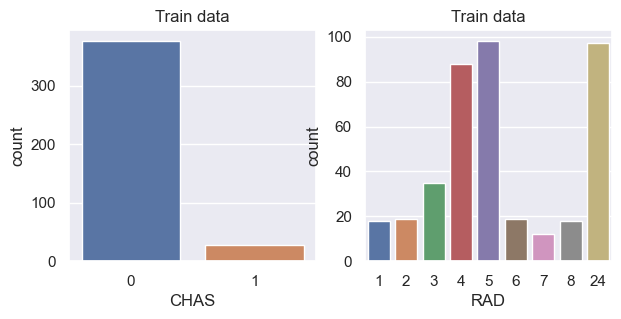

In [22]:
# Variables Categóricas del Train Data:

fig, ax = plt.subplots(ncols=2, figsize=(7, 3))
sns.countplot(x='CHAS', data=X_train_cat, ax=ax[0])
ax[0].set_title('Train data')
sns.countplot(x='RAD', data=X_train_cat, ax=ax[1])
ax[1].set_title('Train data')
plt.show()


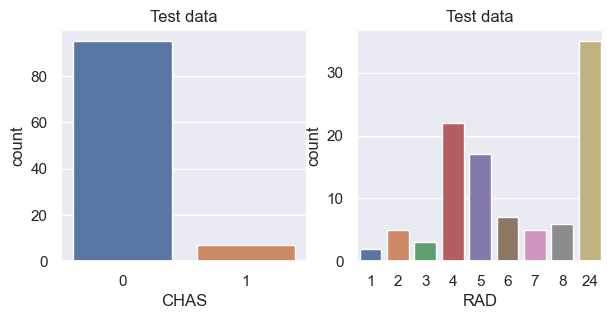

In [23]:
# Variables Categóricas del Test Data:

fig, ax = plt.subplots(ncols=2, figsize=(7, 3))
sns.countplot(x='CHAS', data=X_test_cat, ax=ax[0])
ax[0].set_title('Test data')
sns.countplot(x='RAD', data=X_test_cat, ax=ax[1])
ax[1].set_title('Test data')
plt.show()


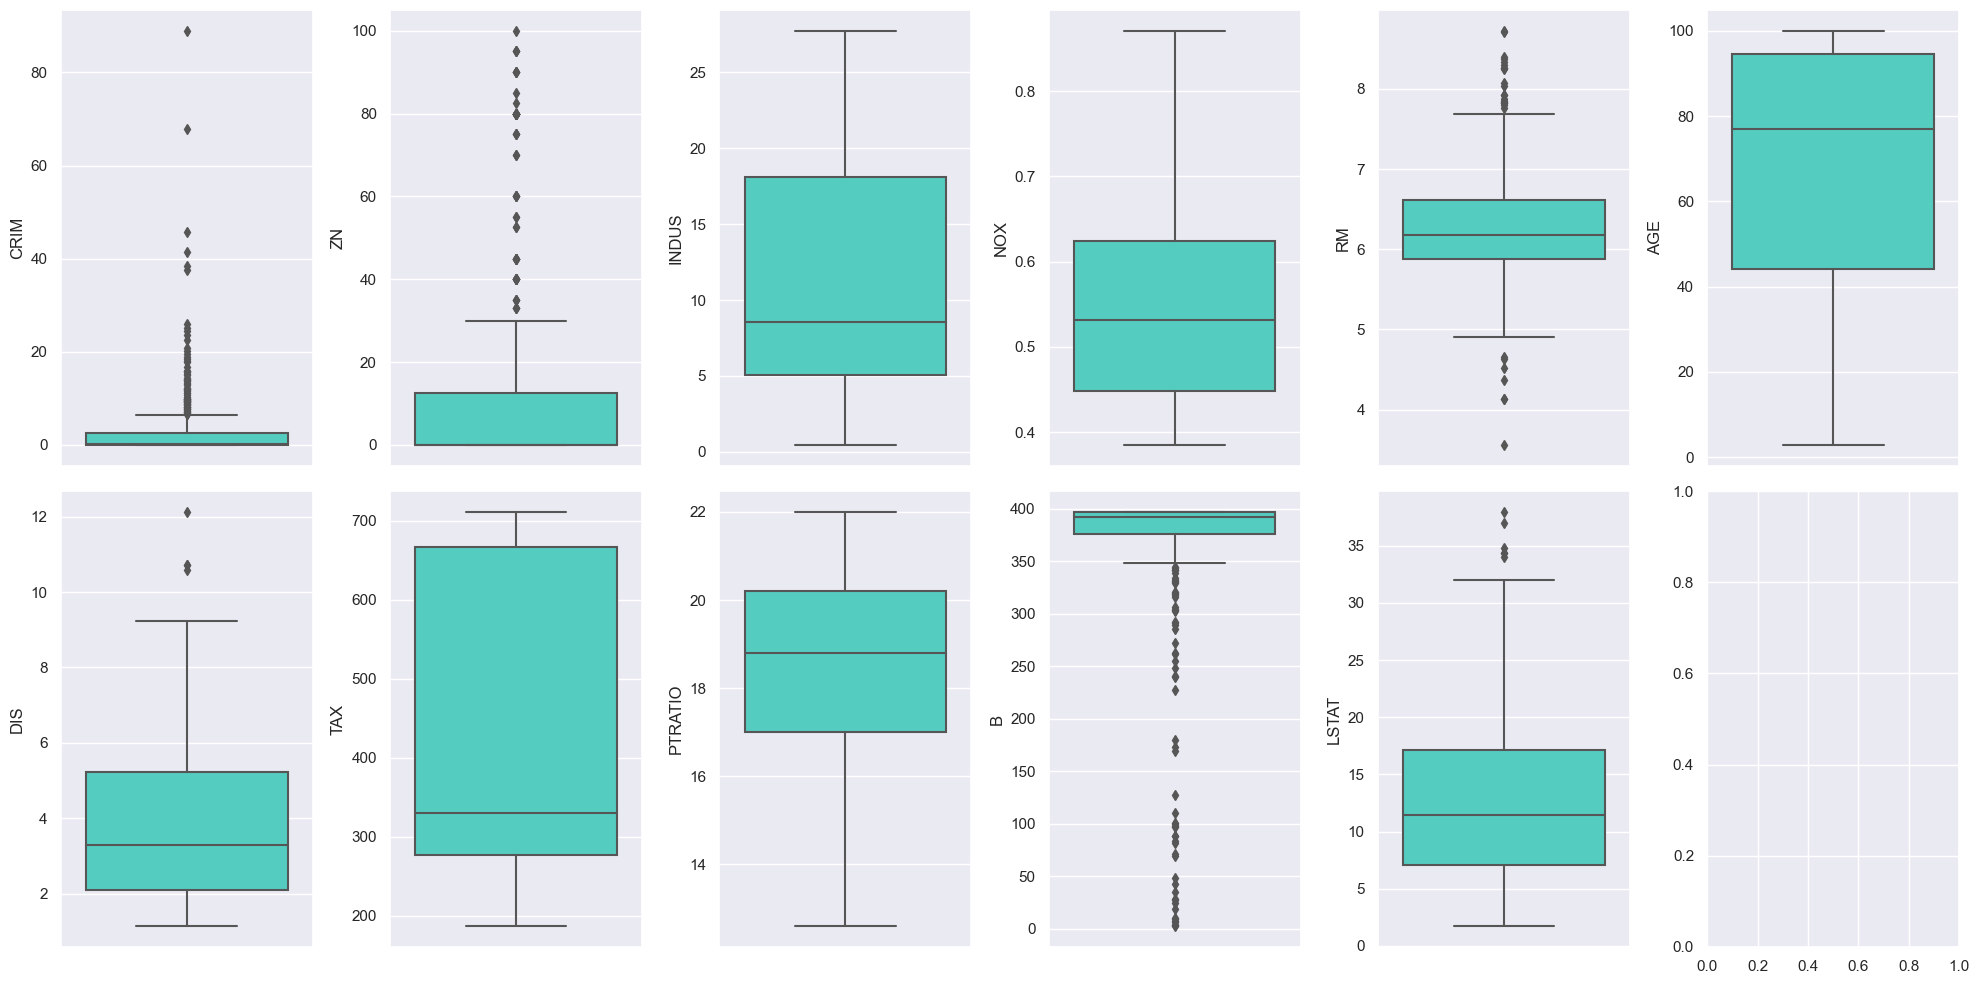

In [24]:
# Variables Numéricas del Train Data

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in X_train_num.items():
    sns.boxplot(y=v, ax=axs[index], color='turquoise')
    index += 1
plt.tight_layout()


In [25]:
# Test de Normalidad de Shapiro-Wilk para las variables Numéricas del Train Data:

from scipy.stats import shapiro
for i in X_train_num.columns:
    data = X_train_num[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

CRIM
stat=0.446, p=0.000
Probably not Gaussian
ZN
stat=0.556, p=0.000
Probably not Gaussian
INDUS
stat=0.903, p=0.000
Probably not Gaussian
NOX
stat=0.930, p=0.000
Probably not Gaussian
RM
stat=0.959, p=0.000
Probably not Gaussian
AGE
stat=0.892, p=0.000
Probably not Gaussian
DIS
stat=0.903, p=0.000
Probably not Gaussian
TAX
stat=0.822, p=0.000
Probably not Gaussian
PTRATIO
stat=0.909, p=0.000
Probably not Gaussian
B
stat=0.470, p=0.000
Probably not Gaussian
LSTAT
stat=0.936, p=0.000
Probably not Gaussian


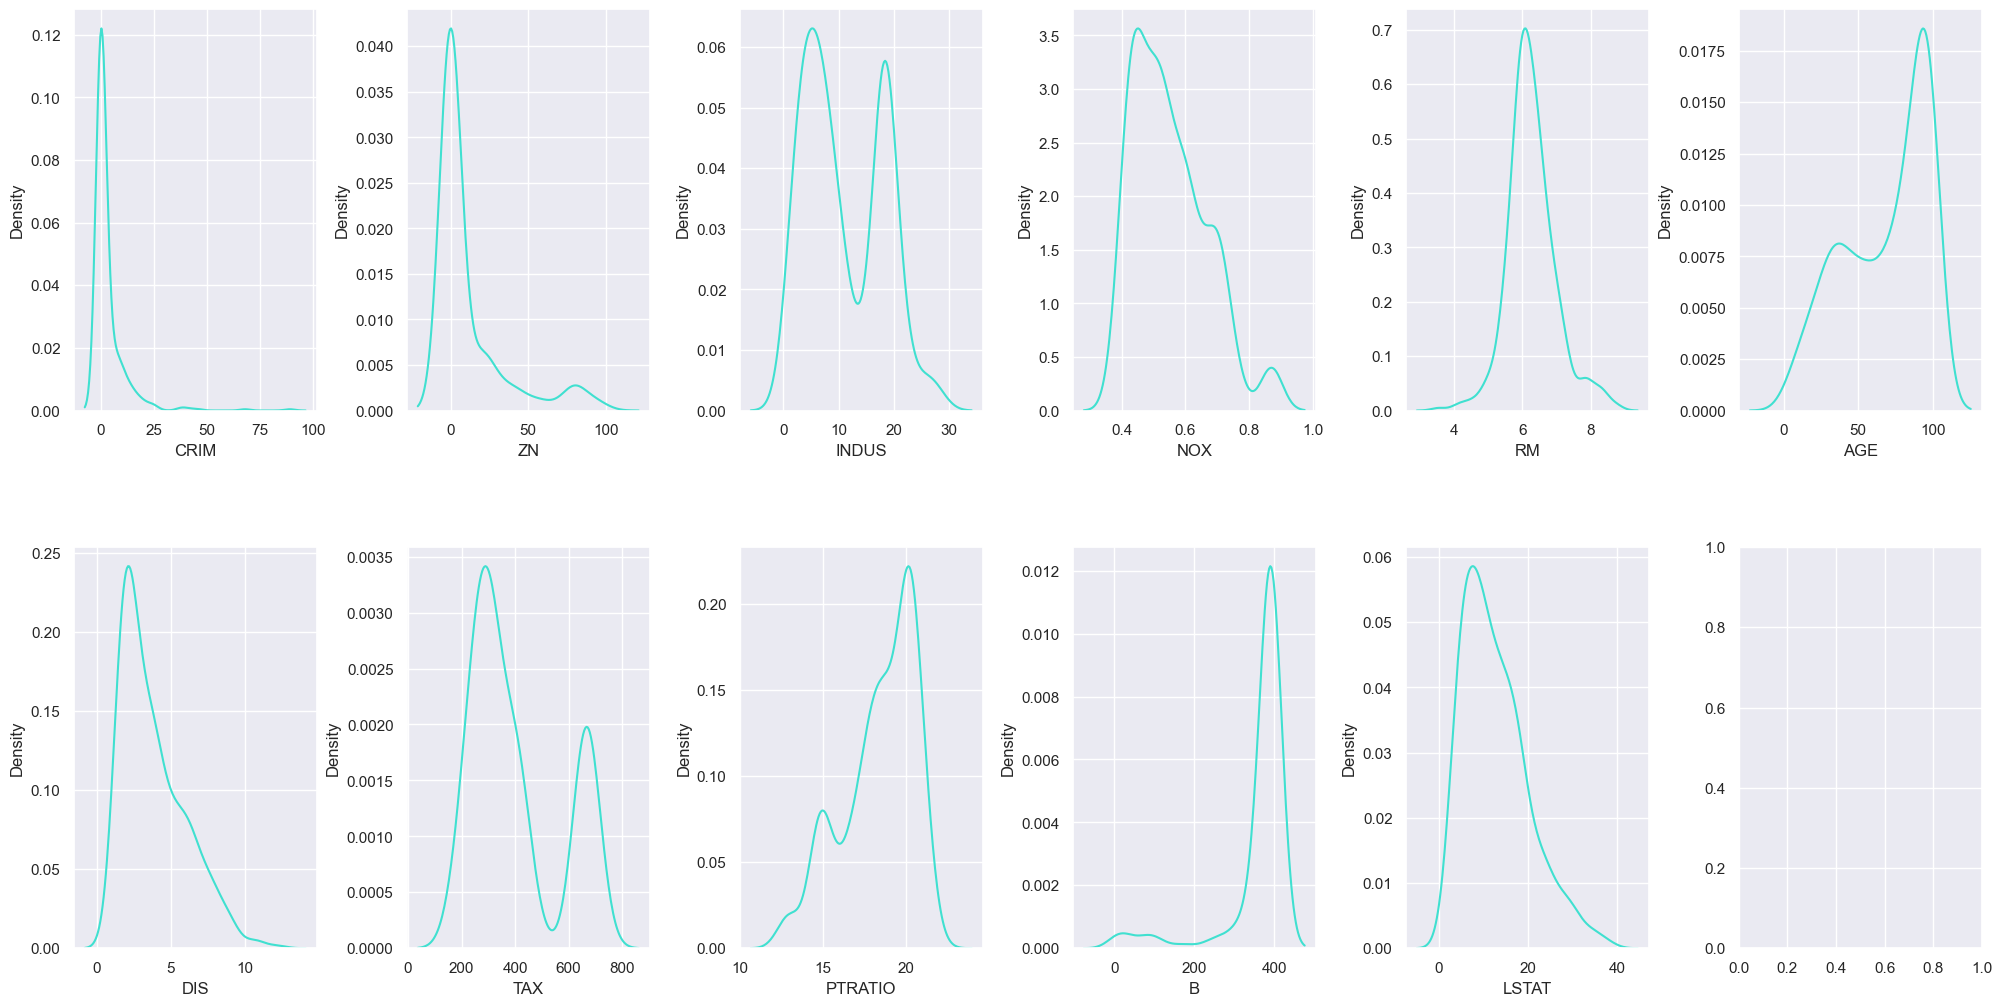

In [26]:
# Variables Numéricas del Train Data

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in X_train_num.items():
    sns.kdeplot(v, ax=axs[index], color='turquoise')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Comprobamos que las distribuciones **no son Gaussianas** mediante el test de Shapiro-Wilk y las representaciones gráficas:

Volvemos a hacer el mismo procedimiento, pero esta vez para las variables numéricas del conjunto de Test.

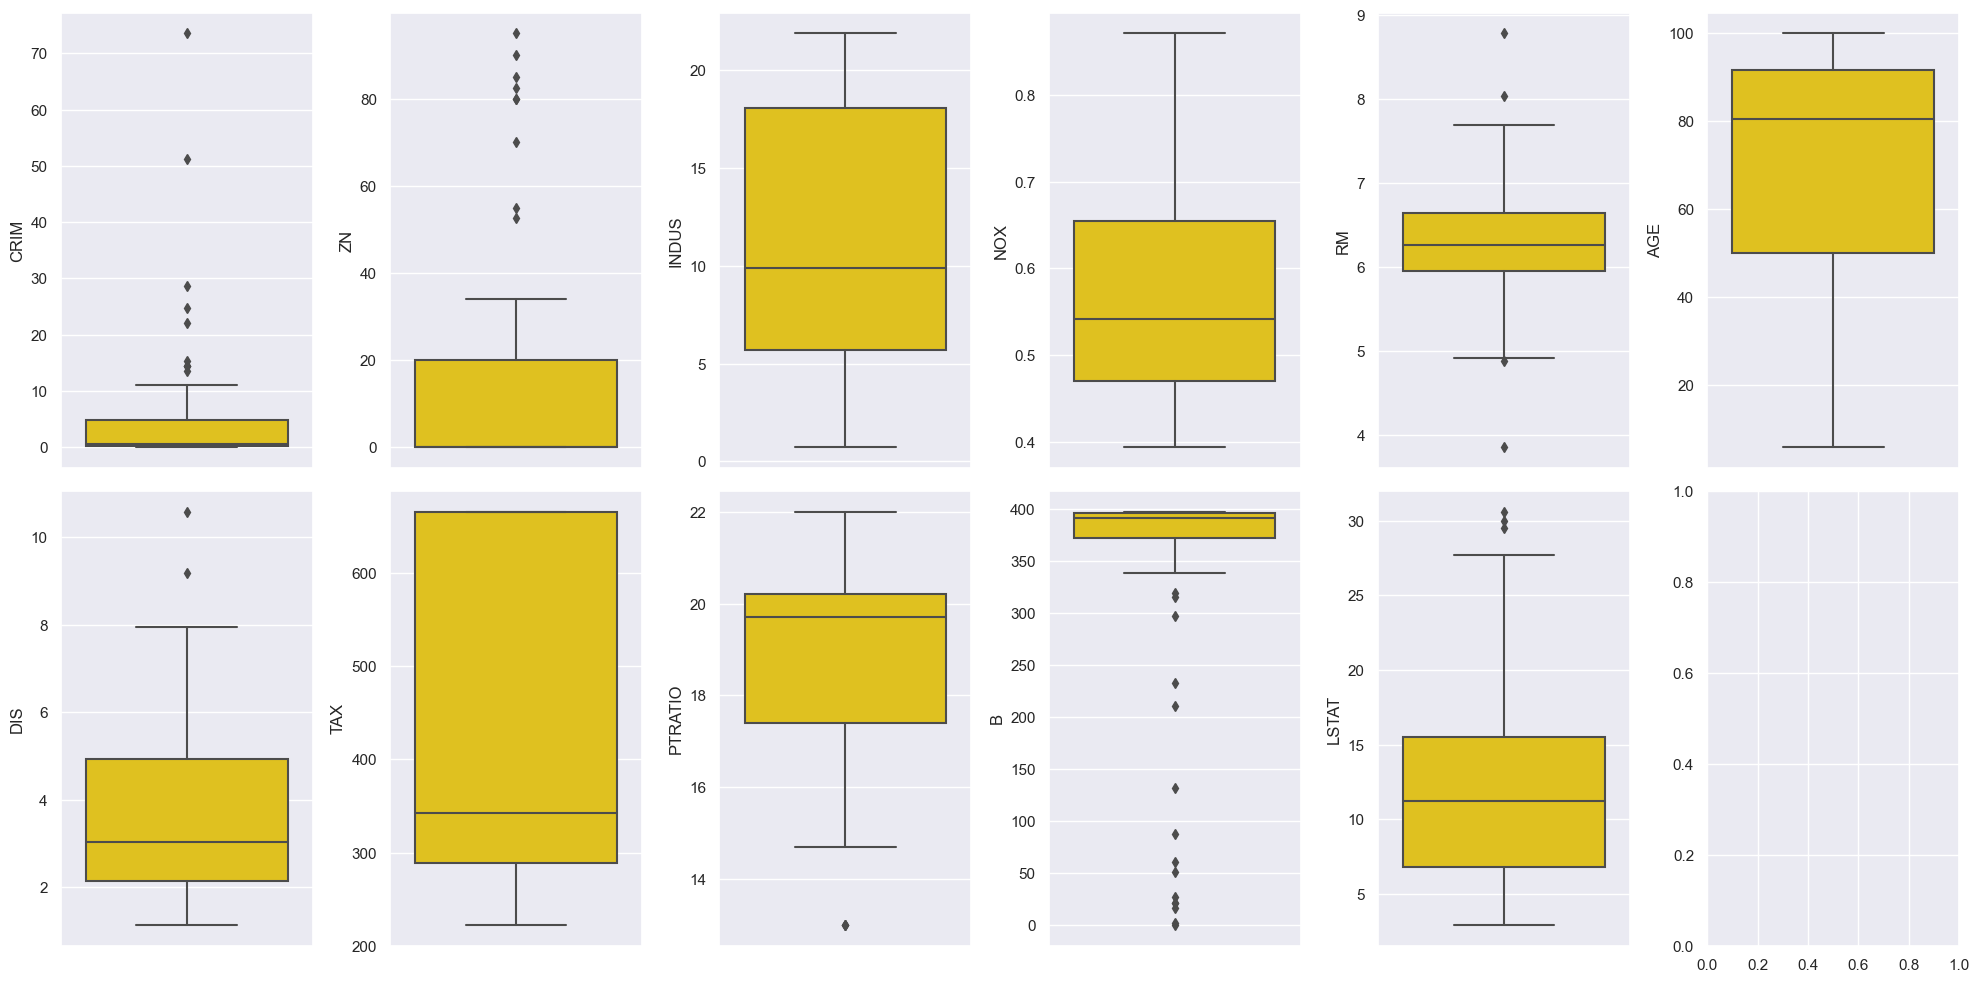

In [27]:
# Variables Numéricas del Test Data

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in X_test_num.items():
    sns.boxplot(y=v, ax=axs[index], color='gold')
    index += 1
    
plt.tight_layout()

In [28]:
# Test de Normalidad de Shapiro-Wilk para las variables Numéricas del Test Data:

from scipy.stats import shapiro
for i in X_test_num.columns:
    data = X_train_num[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

CRIM
stat=0.446, p=0.000
Probably not Gaussian
ZN
stat=0.556, p=0.000
Probably not Gaussian
INDUS
stat=0.903, p=0.000
Probably not Gaussian
NOX
stat=0.930, p=0.000
Probably not Gaussian
RM
stat=0.959, p=0.000
Probably not Gaussian
AGE
stat=0.892, p=0.000
Probably not Gaussian
DIS
stat=0.903, p=0.000
Probably not Gaussian
TAX
stat=0.822, p=0.000
Probably not Gaussian
PTRATIO
stat=0.909, p=0.000
Probably not Gaussian
B
stat=0.470, p=0.000
Probably not Gaussian
LSTAT
stat=0.936, p=0.000
Probably not Gaussian


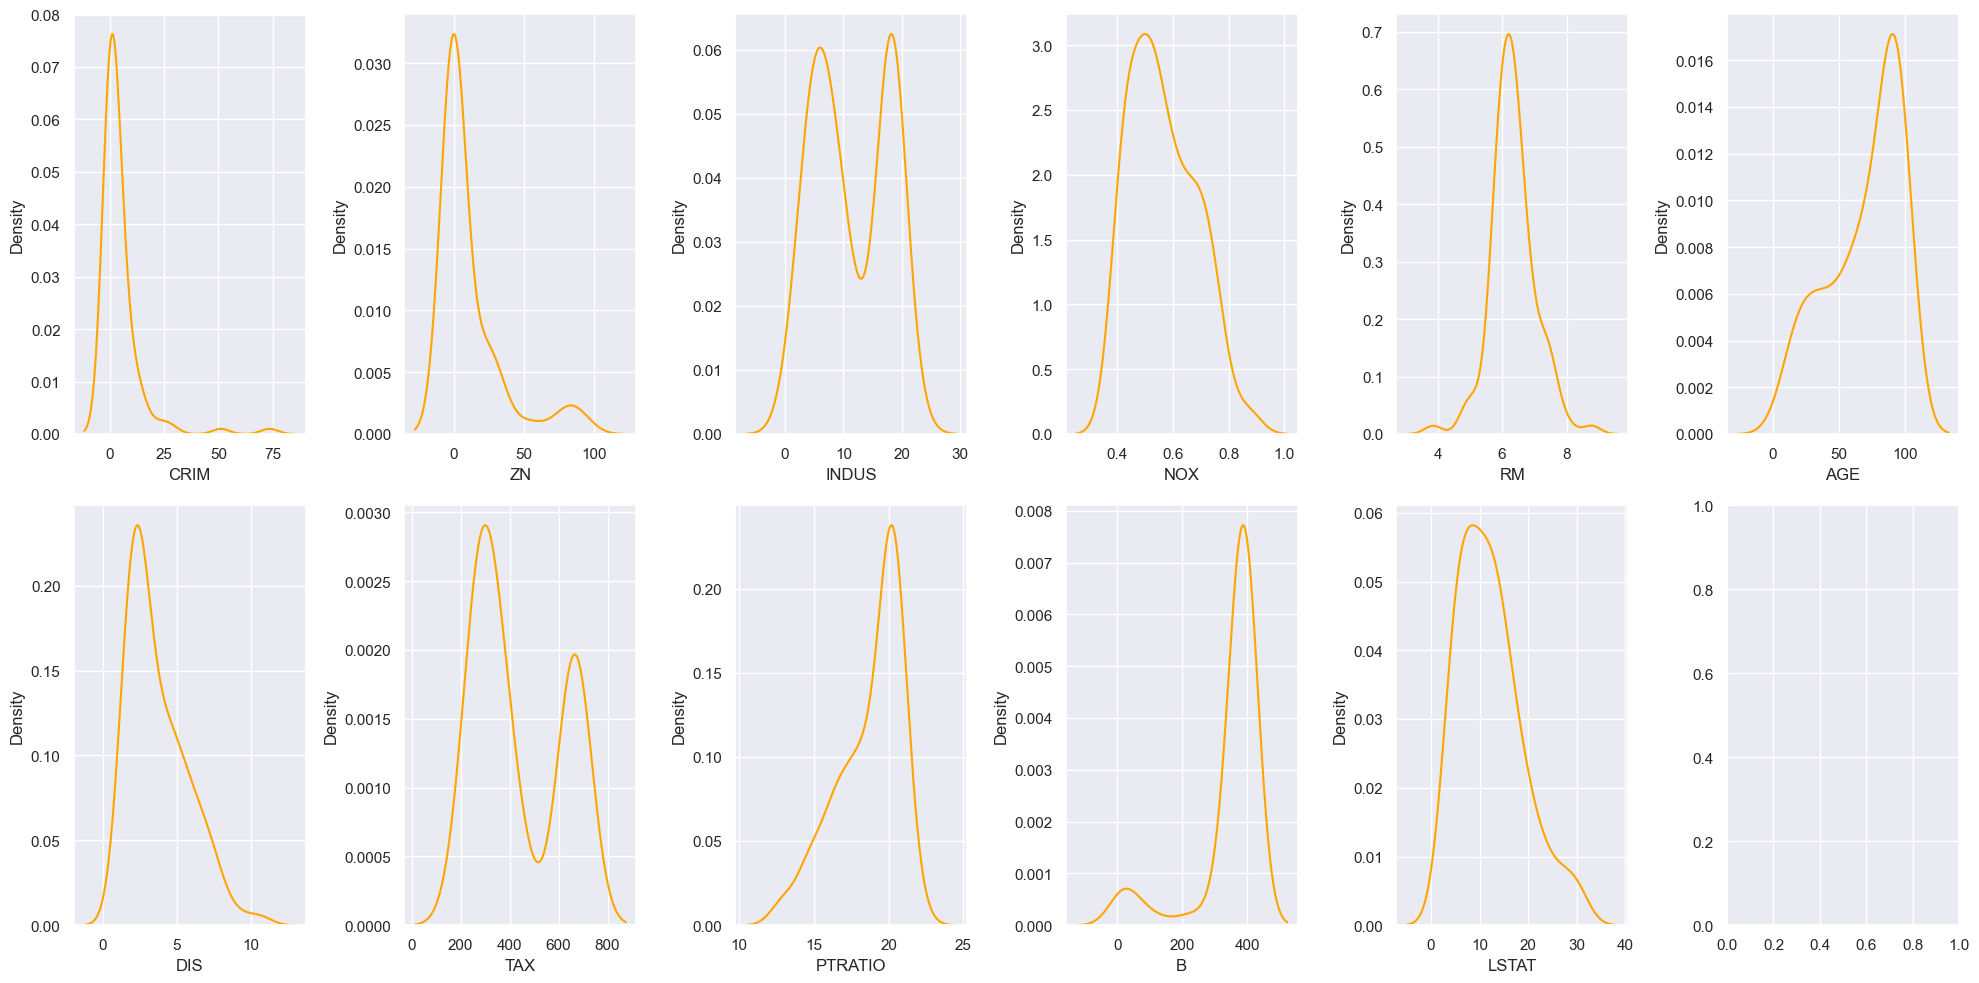

In [29]:
# Variables Numéricas del Test Data

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in X_test_num.items():
    sns.kdeplot(v, ax=axs[index], color='orange')
    index += 1
plt.tight_layout()

Al igual que en el conjunto de Train data, comprobamos que las distribuciones **no son Gaussianas** mediante el test de Shapiro-Wilk y las representaciones gráficas: 
  
Comprobamos ahora las **varianzas** de los diferentes grupos:

In [30]:
# Test de Normalidad de Levene para las variables Numéricas (Train / Test Data):

from scipy import stats

for i in X_train_num.columns:
    print(i)
    stat, p = stats.levene(X_train_num[i], X_test_num[i], center='median')
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('La varianza de las muestras Train / Test son iguales.')
    else:
        print('La varianza de las muestras Train / Test NO son iguales.')

CRIM
stat=1.113, p=0.292
La varianza de las muestras Train / Test son iguales.
ZN
stat=0.002, p=0.962
La varianza de las muestras Train / Test son iguales.
INDUS
stat=1.046, p=0.307
La varianza de las muestras Train / Test son iguales.
NOX
stat=0.219, p=0.640
La varianza de las muestras Train / Test son iguales.
RM
stat=0.204, p=0.652
La varianza de las muestras Train / Test son iguales.
AGE
stat=0.619, p=0.432
La varianza de las muestras Train / Test son iguales.
DIS
stat=0.583, p=0.445
La varianza de las muestras Train / Test son iguales.
TAX
stat=1.493, p=0.222
La varianza de las muestras Train / Test son iguales.
PTRATIO
stat=0.162, p=0.687
La varianza de las muestras Train / Test son iguales.
B
stat=1.313, p=0.252
La varianza de las muestras Train / Test son iguales.
LSTAT
stat=1.257, p=0.263
La varianza de las muestras Train / Test son iguales.


Mediante el test de Levene, podemos ver que la varianza de las muestras es la misma, en cada variable (comparando Train / Test data)

**Exercici 2**  
  
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

**1.Escalamiento de características:** (Feature Scaling) Consiste en llevar las características (variables) a una escala común para evitar que alguna característica domine sobre las demás debido a su rango de valores.  
- **Normalización** (MinMax Scaling): Escala los valores de las características a un rango específico, como [0, 1].  
- **Estandarización** (Standardization): Transforma los valores de las características para que tengan una media de cero y una desviación estándar de uno.  
- **Robust Scaler:** Robust Scaler es una técnica de escalado robusta frente a los *valores atípicos* en los datos. Utiliza la mediana y el rango intercuartílico para realizar la transformación de las características.  

**2.Codificación de variables categóricas:** Si existen variables categóricas (variables que toman valores de categorías o etiquetas en lugar de valores numéricos), se necesita codificarlas en una forma numérica para que los algoritmos de machine learning puedan trabajar con ellas.  
- **Codificación one-hot** (One-Hot Encoding): Crea variables binarias separadas para cada categoría, donde el valor es 1 si la instancia pertenece a esa categoría y 0 de lo contrario.  
- **Codificación de etiquetas** (Label Encoding): Asigna a cada categoría un valor numérico único.  

**3.Manejo de valores faltantes:** Si los datos contienen valores faltantes o nulos, es necesario tomar medidas para manejarlos.  
-  **Eliminación de muestras** o características con valores faltantes.  
- **Imputación de valores faltantes:** Reemplazo de los valores faltantes por estimaciones basadas en otras observaciones o técnicas como la media, mediana o moda de la característica correspondiente.  

**4.Reducción de dimensionalidad:** Si los datos tienen un alto número de características o dimensiones, se puede aplicar técnicas de reducción de dimensionalidad para extraer un conjunto más pequeño de características relevantes. Algunas técnicas comunes incluyen:  
- **Análisis de componentes principales** (**PCA**, por sus siglas en inglés): Transforma las características originales en un nuevo conjunto de características no correlacionadas llamadas *componentes principales*.
- **Selección de características:** Identifica las características más relevantes y elimina las redundantes o menos informativas.

Dado que las variables numéricas no son Gaussianas, aplicaremos **Robust Scaler** para las que contienen valores atípicos y **MinMax Scaling** para las variables sin valores atípicos.  
En cuanto al las variables categóricas (CHAS y RAD), aplicaremos la Codificación **One-Hot**.

- variables con *outliers*: CRIM, ZN, RM, DIS, B, LSTAT. (Robust Scaler)
- Variables sin *Outliers*: INDUS, NOX, AGE, TAX, PTRATIO. (MinMax Scaling)
- Variables Categóricas: CHAS, RAD. (One-Hot)

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Copia de la BD para tener las transformaciones:
viviendas_transf = viviendas.copy()

col_RS = ['CRIM','ZN','RM','DIS', 'B','LSTAT']

scaler = preprocessing.RobustScaler().fit(viviendas_transf[col_RS])
viviendas_transf[col_RS] = scaler.transform(viviendas_transf[col_RS])
viviendas_transf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,2.31,0,0.538,0.496612,65.2,0.285777,1,296.0,15.3,0.261902,-0.637681,24.0
1,-0.063755,0.00,7.07,0,0.469,0.287940,78.9,0.569789,2,242.0,17.8,0.261902,-0.221889,21.6
2,-0.063760,0.00,7.07,0,0.469,1.323171,61.1,0.569789,2,242.0,17.8,0.066675,-0.732634,34.7
3,-0.062347,0.00,2.18,0,0.458,1.069783,45.8,0.924391,3,222.0,18.7,0.153016,-0.841579,33.4
4,-0.052144,0.00,2.18,0,0.458,1.271680,54.2,0.924391,3,222.0,18.7,0.261902,-0.602699,36.2


In [32]:
from sklearn.preprocessing import MinMaxScaler

col_MMS = ['INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO']

scaler2 = preprocessing.MinMaxScaler().fit(viviendas_transf[col_MMS])
viviendas_transf[col_MMS] = scaler2.transform(viviendas_transf[col_MMS])
viviendas_transf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,0.287234,0.261902,-0.637681,24.0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,0.553191,0.261902,-0.221889,21.6
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,0.553191,0.066675,-0.732634,34.7
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,0.648936,0.153016,-0.841579,33.4
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,0.648936,0.261902,-0.602699,36.2


Observamos valores unicos de las variables categóricas:

In [33]:
print(viviendas_transf['CHAS'].unique())
print(viviendas_transf['RAD'].unique())

[0 1]
[ 1  2  3  5  4  8  6  7 24]


In [34]:
viviendas_transf = pd.get_dummies(data = viviendas_transf, columns = ['CHAS','RAD'])
viviendas_transf.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0.314815,0.496612,0.641607,0.285777,0.208015,0.287234,0.261902,...,0,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0.172840,0.287940,0.782698,0.569789,0.104962,0.553191,0.261902,...,0,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0.172840,1.323171,0.599382,0.569789,0.104962,0.553191,0.066675,...,0,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0.150206,1.069783,0.441813,0.924391,0.066794,0.648936,0.153016,...,0,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0.150206,1.271680,0.528321,0.924391,0.066794,0.648936,0.261902,...,0,0,0,1,0,0,0,0,0,0


**Exercici 3**
  
Resumeix les noves columnes generades de manera estadística i gràfica

In [35]:
viviendas_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
 12  CHAS_0   506 non-null    uint8  
 13  CHAS_1   506 non-null    uint8  
 14  RAD_1    506 non-null    uint8  
 15  RAD_2    506 non-null    uint8  
 16  RAD_3    506 non-null    uint8  
 17  RAD_4    506 non-null    uint8  
 18  RAD_5    506 non-null    uint8  
 19  RAD_6    506 non-null    uint8  
 20  RAD_7    506 non-null    uint8  
 21  RAD_8    506 non

In [36]:
round(viviendas_transf.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.934,2.393,-0.070,-0.049,-0.000,0.951,24.678
ZN,506.0,0.909,1.866,0.000,0.000,0.000,1.000,8.000
INDUS,506.0,0.391,0.251,0.000,0.173,0.338,0.647,1.000
NOX,506.0,0.349,0.238,0.000,0.132,0.315,0.492,1.000
RM,506.0,0.103,0.952,-3.587,-0.438,0.000,0.562,3.484
AGE,506.0,0.676,0.290,0.000,0.434,0.768,0.939,1.000
DIS,506.0,0.190,0.682,-0.673,-0.359,0.000,0.641,2.888
TAX,506.0,0.422,0.322,0.000,0.176,0.273,0.914,1.000
PTRATIO,506.0,0.623,0.230,0.000,0.511,0.686,0.809,1.000
B,506.0,-1.668,4.379,-18.761,-0.770,0.000,0.230,0.262


Las medias parecen estar mucho más cercanas (exceptuando claro el valor de la columna Target).  
Sin embargo, la media de la variable B parece que se sale un poco del conjunto.)

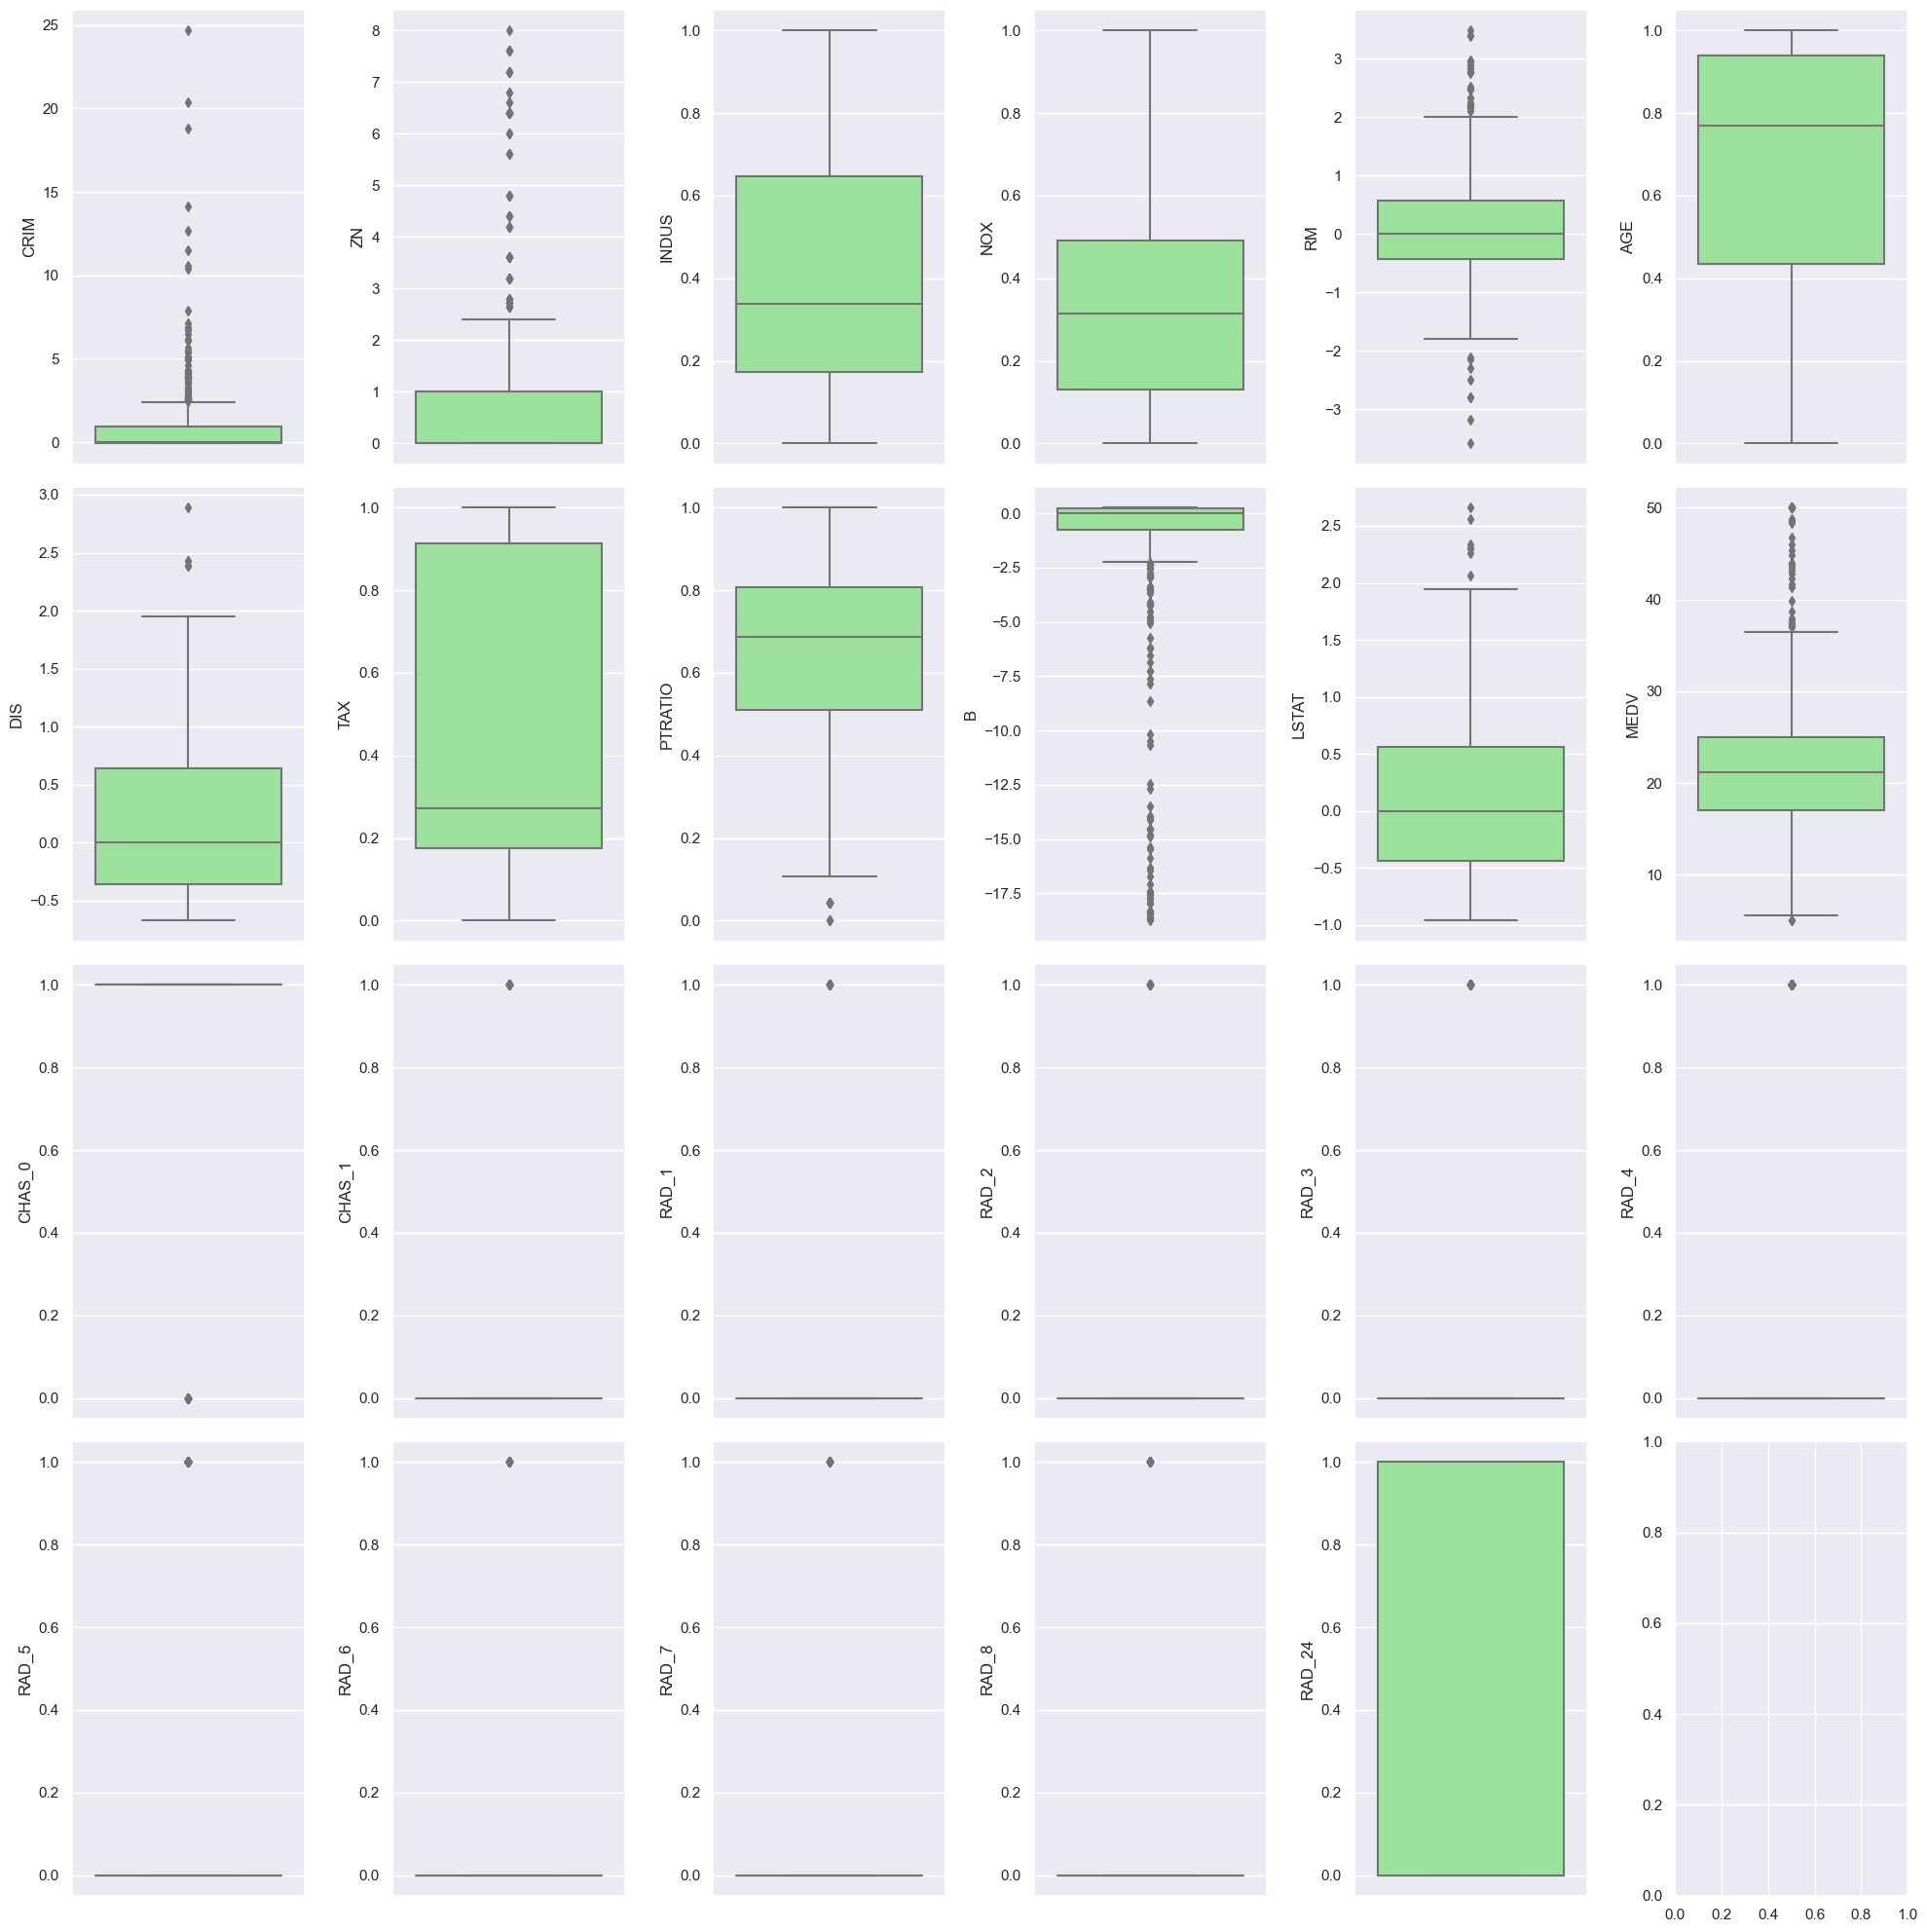

In [37]:
# Graficos de BDD viviendas_transf:

fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()

for k,v in viviendas_transf.items():
    sns.boxplot(y=v, ax=axs[index], color='lightgreen')
    index += 1
plt.tight_layout()

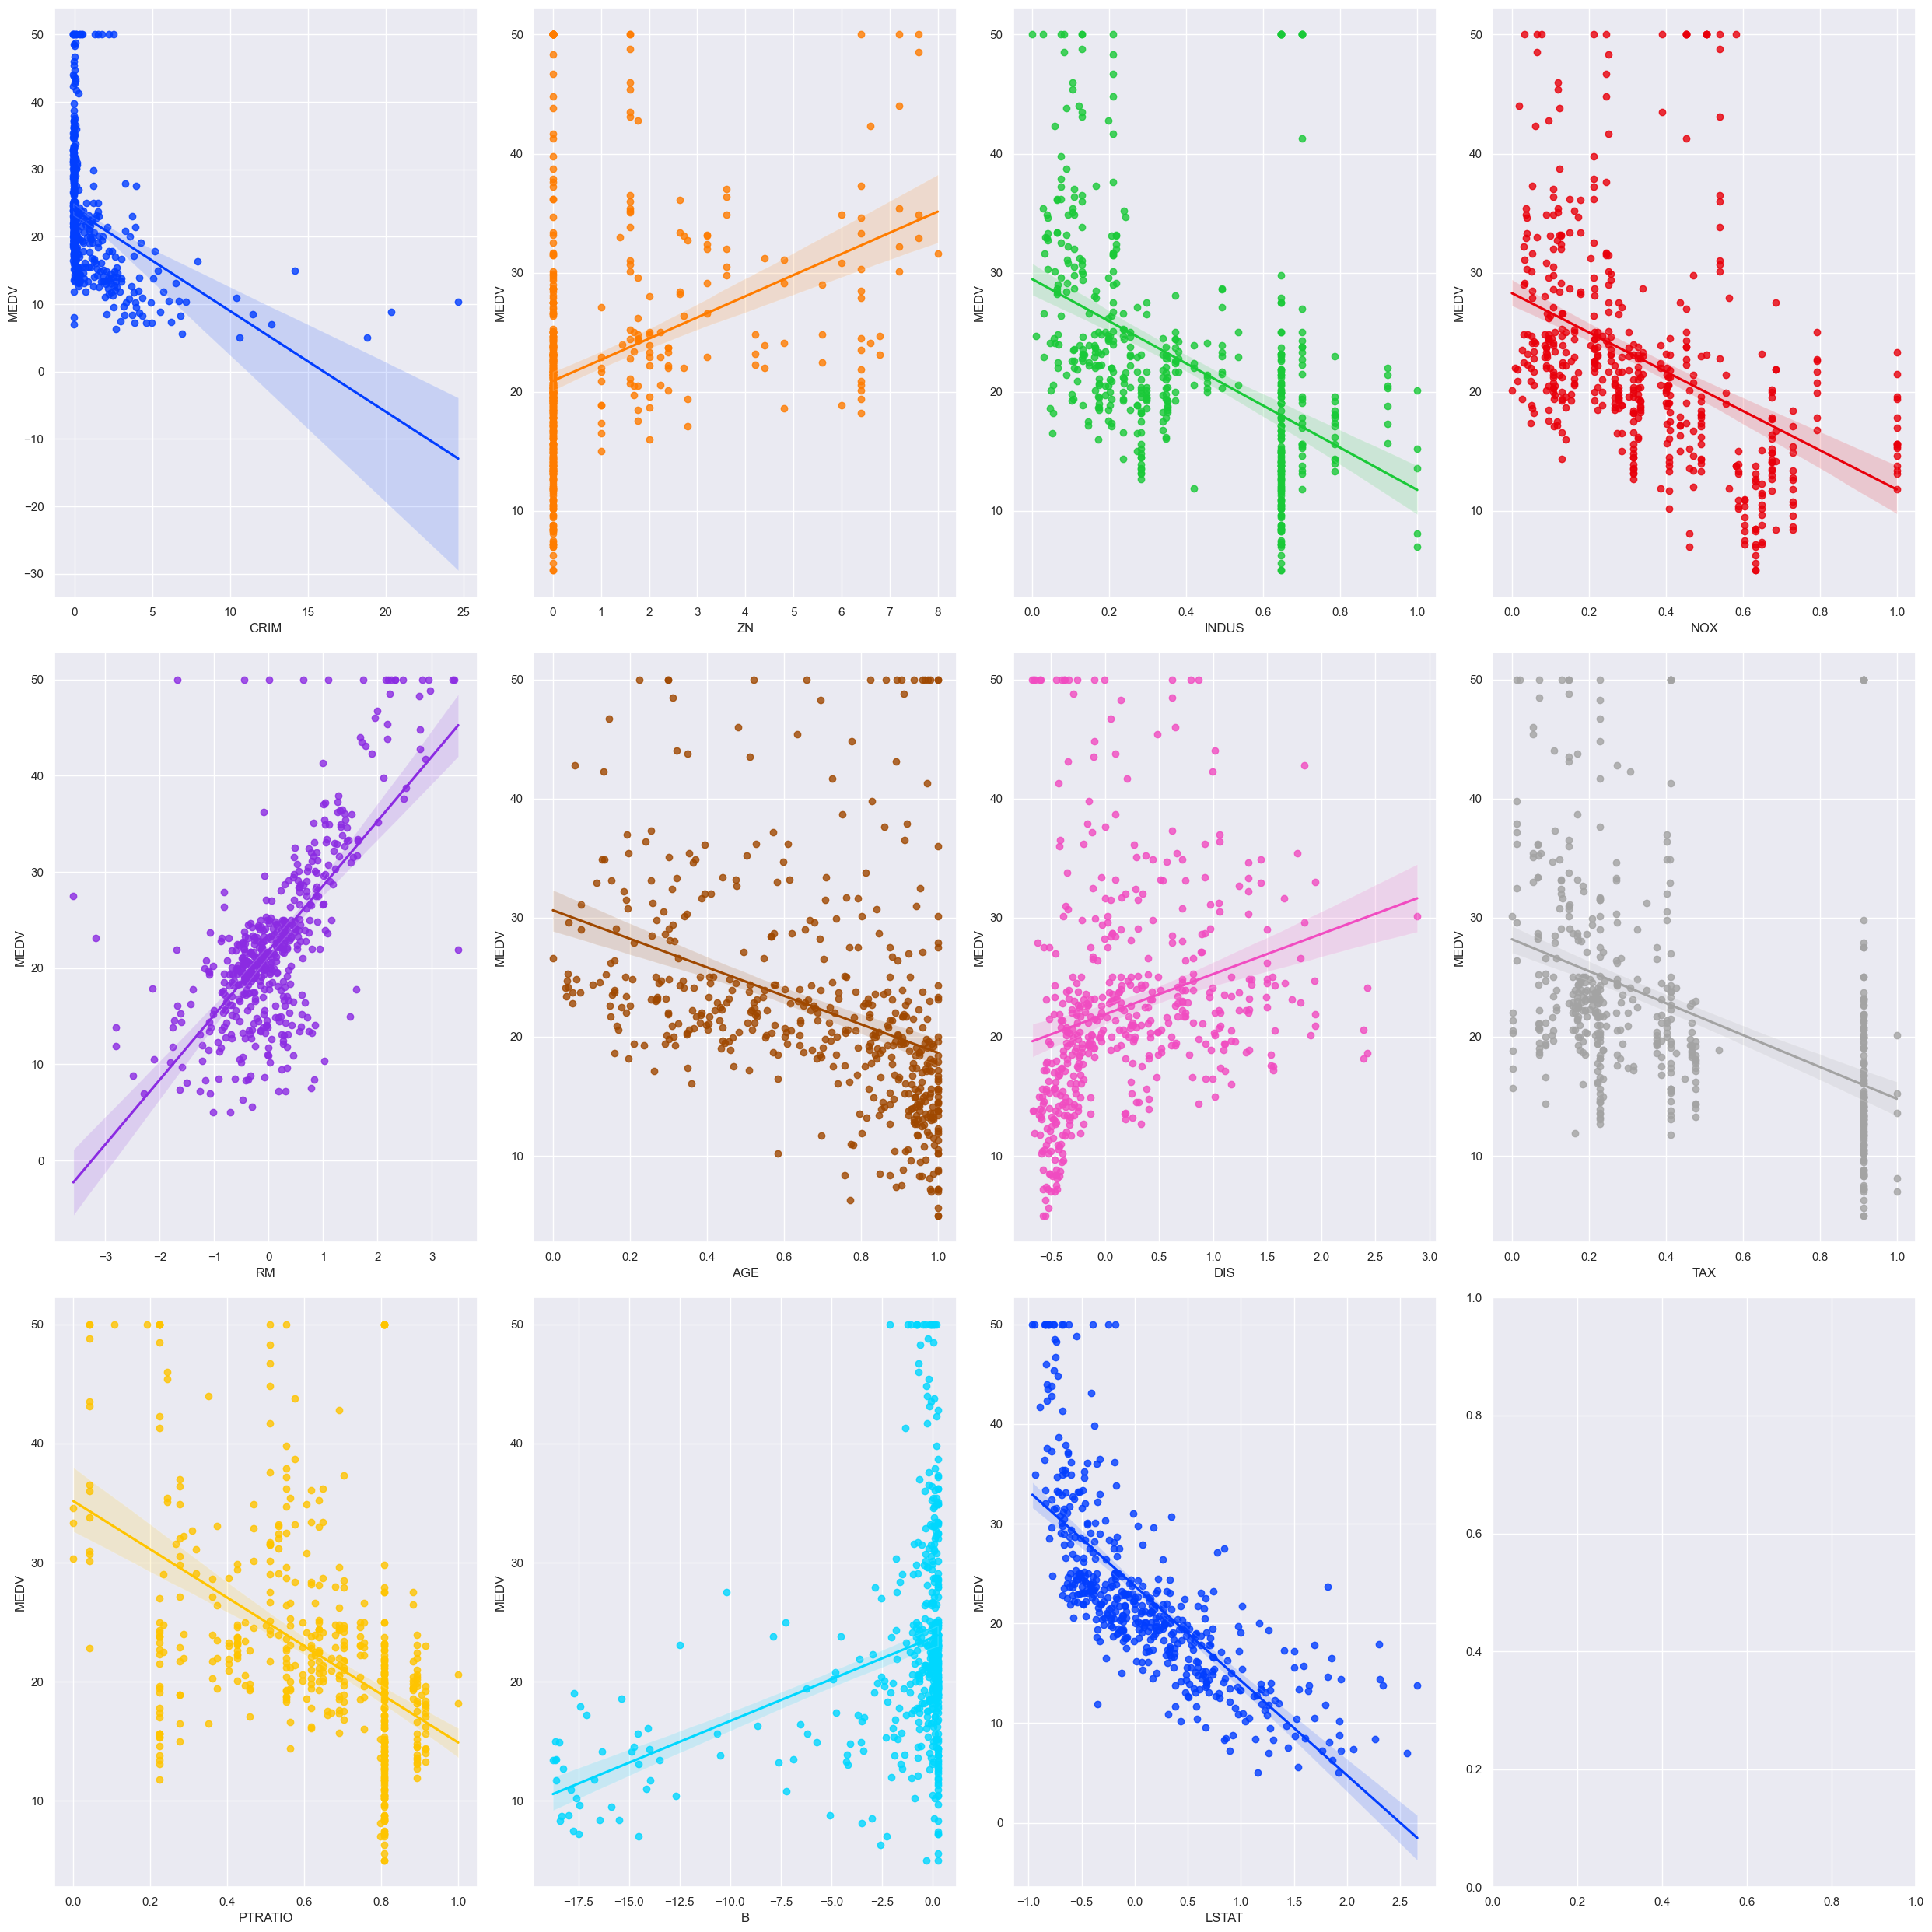

In [39]:
# Graficas de correlación entre las variables con la variable Target:

col_rl = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO' ,'B', 'LSTAT']
x_rl = viviendas_transf.loc[:, col_rl ]
y_rl = viviendas_transf['MEDV']

fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25, 25))
index = 0
axs = axs.flatten()

for k,v in enumerate(col_rl):
    sns.regplot(y=y_rl, x =x_rl[v], ax=axs[index], color = sns.color_palette('bright',12)[k])
    index += 1
plt.tight_layout()

En un primer vistazo a los gráficos, vemos que existe una correlación mayor de la Target con las variables 'RM' y 'LSTAT' que con el resto de variables. Esto querría decir que los que más influye en el precio de las viviendas seria:  
- **RM:** El número de cuartos que tiene la vivienda (Parece lógico que sea así, puesto que aunque no sea extrictamente necesario, las casas con más habitaciones, son más grandes).
- **LSTAT:** La proporción de población en situación socioeconómica vulnerable. (Parece lógico tambíén que a igualdad de casa, sea más cara la que está en un barrio con menos pobreza. La linea es descendiente:a mayor pobreza, menos precio)

Comparamos las gráficas de las variables de **antes y despues de la transformación**, para observar los cambios que se hayan podido producir en las muestras.

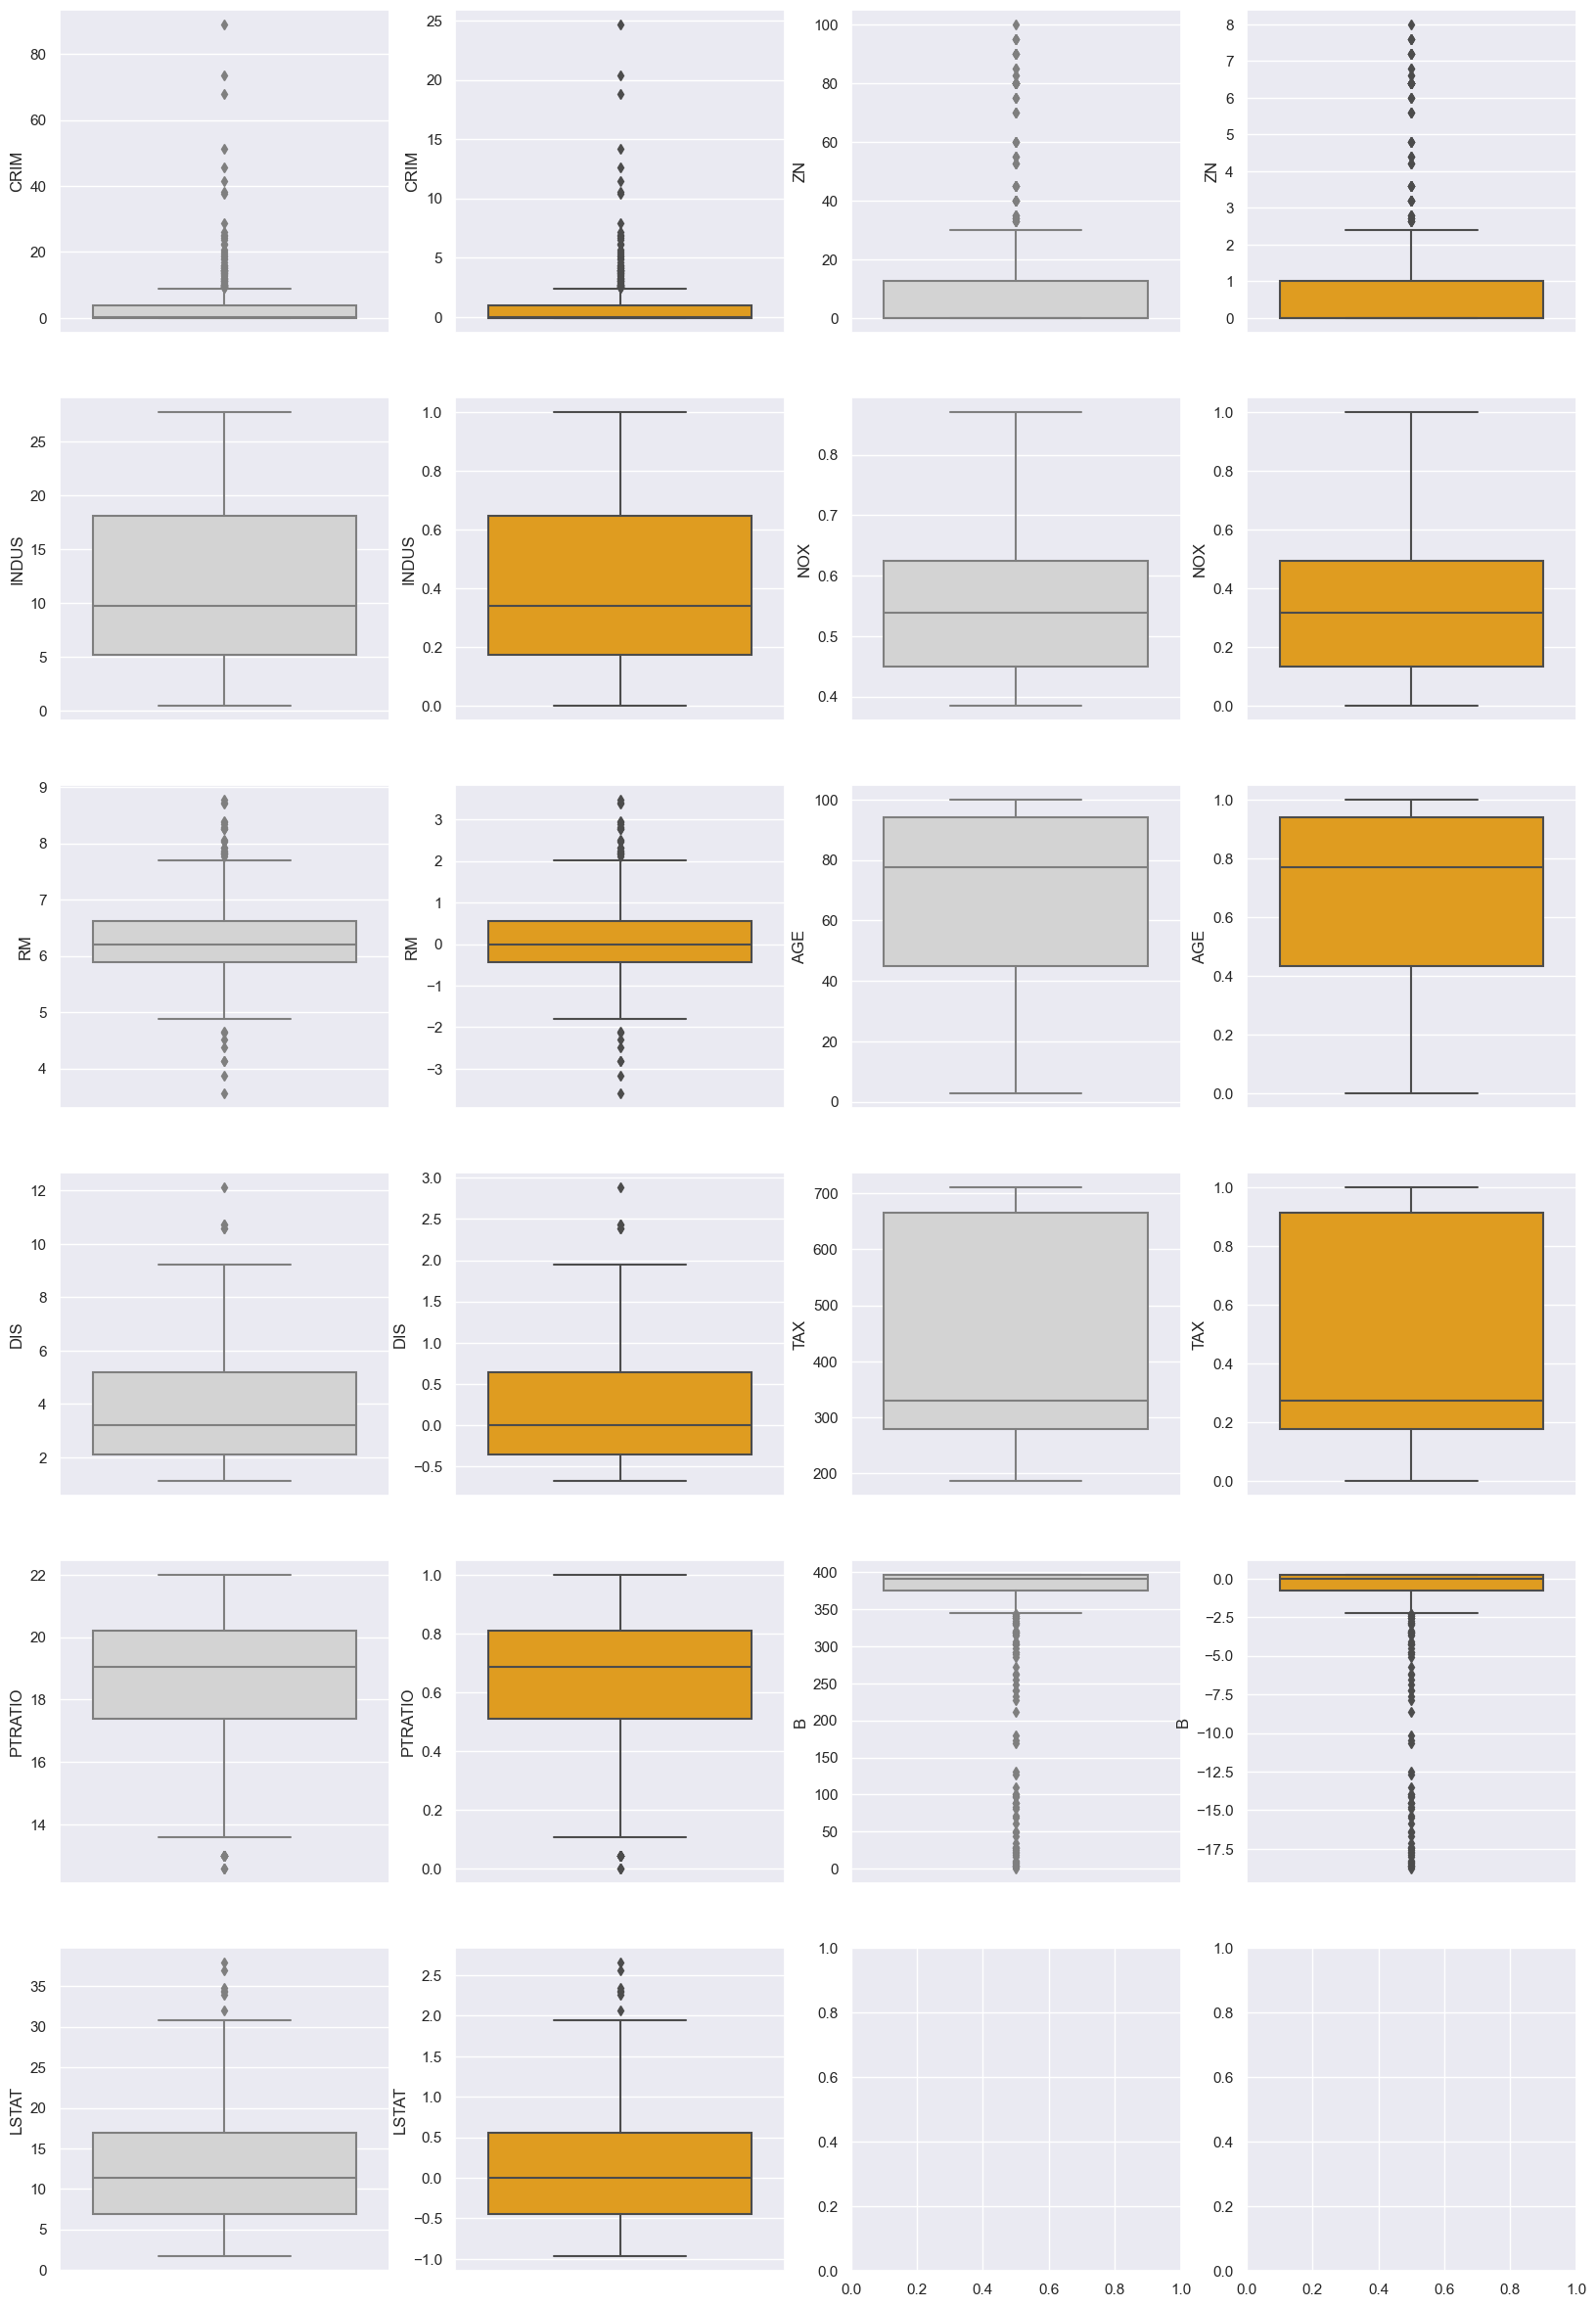

In [40]:
# Variables antes y después de la Transformación:

col_comp= ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO' ,'B', 'LSTAT']

fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(20, 30))
index = 0
axs = axs.flatten()

for k,v in enumerate(col_comp):
    sns.boxplot(ax = axs[index], y=viviendas[v], data = viviendas, color='lightgrey')
    sns.boxplot(ax = axs[index +1], y=viviendas_transf[v], data = viviendas_transf, color='orange')
    index += 2

NO parece apreciarse diferencias significativas entre los datos de las variables antes y despues de ser tratados.